### <b>1.0 Problem Identification</b>

#### <b>1.1 Loan Defaults in Africa</b>

African financial deepening is beset by a high rate of loan defaults, which encourages banks to hold liquid assets instead of lending [1].

This risk of sovereign default continues to grow across Africa because of higher debt levels and currency risk [2].

##### <b>1.2 Background Information</b>

Countries in Sub-Saharan Africa (SSA) have been hurt economically by the Covid-19 pandemic, with a regional GDP contraction of 3.3% expected this year, according to data from the International Monetary Fund (IMF) [3]. 

Many SSA countries face a drop in financial inflows – remittances, foreign direct investments (FDI), official development aid (ODA) and portfolio investments [3].

On the other hand, James Mwangi, chief executive officer of Kenya’s Equity Bank, responds in the affirmative: With even small loans, he told Africa Renewal, “<em>We have seen families graduate from micro-enterprises to semi-medium enterprises.</em>” [3].

##### <b>1.3 Approach</b>

One of the ways we want to address this challenge is:

##### <b>1.3.1 Sustainable Development Goals</b>

Promoting high-impact loan alternatives to low-income individuals, and those in the informal sector to meet basic needs, start up or expand businesses, which can make a huge impact in addressing SDG goals that include: 

* No Poverty, 
* Decent Work and Economic Growth, 
* Reducing Inequality [3].

###### <b>1.3.2 Global Challenges</b>

High-impact loans can also promise to address:

* Job creation,
* Education, 
* Healthcare, 

that are among the African Leadership University's 7 Grand Challenges, as illustrated by Fred Swaniker, the Founder and CEO of African Leadership University [1].




### <b>2.0 Task</b>

SuperLender is a local digital lending company, which prides itself in its effective use of credit risk models to deliver profitable and high-impact loan alternative. 

#### <b>2.1 Decision Making Process</b>

The company's assessment approach is based on two main risk drivers of loan default prediction:

1. Willingness to pay, and 
2. Ability to pay. 

These two fundamental drivers need to be determined at the point of each application to allow the credit grantor to make a calculated decision based on repayment odds, which in turn determines if an applicant should get a loan, and if so - what the size, price and tenure of the offer will be.

#### <b>2.2 Credit Risk Models</b>

There are two types of risk models in general: 

* <em>New business risk</em>

This model would be used to assess the risk of application(s) associated with the first loan that he/she applies. 

* <em>Repeat or behaviour risk model</em>

This model would be used in case the customer has been a client and applies for a repeat loan. In this case, we will have additional performance on how he/she repaid their prior loans, which we can incorporate into our risk model.

#### <b>2.3 Goal</b>

In order to deliver profitable and high-impact loan alternative - since not all customers pay back, the company requires experienced data scientists to build robust models to effectively predict the odds of repayment.

We are required to predict if a loan is good or bad, that is, accurately predict binary outcome variable, where Good is 1 and Bad is 0 [4].


### <b>3.0 Methodology</b>

The following steps were taken to create a highly predictive model:

* Problem Breakdown
* Environment Setup
* Data Collection
* Understanding the Data
* Visualizing the Data
* Feature Engineering
* Feature Selection
* Model Build
* Making a submission

### <b>4.0 Problem Breakdown</b>

The goal of this challenge is to use historical financing and socioeconomic data to predict whether or not an applicant will be able to repay a loan. This machine learning task is:

* <b>Supervised</b>: The labels are included in the training data and the goal is to train a model to learn to predict labels from the features.

* <b>Classification</b>: The label is a binary variable, 1 ('Good' - will repay loan on time), 0 ('Bad' - will have difficulty repaying loan).



### <b>5.0 Environment Setup</b>

#### <b>5.1 Import Libraries</b>

In [4]:
# Import libraries

# Data preprocessing
import pandas as pd    # dataframe manipulation
import numpy as np     # numerical python
import datetime as dt   # converting date formats
import seaborn as sns     # visuals
import matplotlib.pyplot as plt   # plots

from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.pipeline import make_pipeline, Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split, GridSearchCV

# algorithms
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from xgboost.sklearn import XGBClassifier
from sklearn.dummy import DummyClassifier
from sklearn.ensemble import GradientBoostingClassifier

# testing other models
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.neural_network import MLPClassifier

# results
from sklearn.metrics import confusion_matrix,accuracy_score,recall_score,roc_auc_score,classification_report,roc_auc_score,roc_curve,auc, precision_score, f1_score
from sklearn import preprocessing,metrics 
import itertools

import warnings
warnings.filterwarnings('ignore')   # ignore warnings

import os   # file system management
import gc   # memory management

In [5]:
# Setting styles 
pd.options.display.max_columns =200
pd.options.display.max_rows =30
pd.options.display.float_format = '{:,.2f}'.format

plt.style.use('ggplot')
plt.rcParams['figure.figsize'] = (18, 8)

%config InlineBackend.figure_format = 'svg'

%matplotlib inline

### <b>6.0 Data Collection</b>


#### <b>6.1 Data Description</b>

There are 3 different datasets for both train and test.

The sample submission has 2 outcomes- good (1) or bad (0).

##### <b>6.1.1 Demographic data (traindemographics.csv)</b>

* customerid (Primary key used to merge to other data)
* birthdate (date of birth of the customer)
* bank_account_type (type of primary bank account)
* longitude_gps
* latitude_gps
* bank_name_clients (name of the bank)
* bank_branch_clients (location of the branch - not compulsory - so missing in a lot of the cases)
* employment_status_clients (type of employment that customer has)
* level_of_education_clients (highest level of education)

##### <b>6.1.2 Performance data (trainperf.csv)</b>

This is the repeat loan that the customer has taken for which we need to predict the performance of. Basically, we need to predict whether this loan would default given all previous loans and demographics of a customer.

* customerid (Primary key used to merge to other data)
* systemloanid (The id associated with the particular loan. The same customerId can have multiple systemloanid’s for each loan he/she has taken out)
* loannumber (The number of the loan that you have to predict)
* approveddate (Date that loan was approved)
* creationdate (Date that loan application was created)
* loanamount (Loan value taken)
* totaldue (Total repayment required to settle the loan - this is the capital loan value disbursed +interest and fees)
termdays (Term of loan)
* referredby (customerId of the customer that referred this person - is missing, then not referred)
* good_bad_flag (good = settled loan on time; bad = did not settled loan on time) - this is the target variable that we need to predict

##### <b>6.1.3 Previous loans data (trainprevloans.csv)</b>

This dataset contains all previous loans that the customer had prior to the loan above that we want to predict the performance of. Each loan will have a different systemloanid, but the same customerid for each customer.

* customerid (Primary key used to merge to other data)
* systemloanid (The id associated with the particular loan. The same customerId can have multiple systemloanid’s for each loan he/she has taken out)
* loannumber (The number of the loan that you have to predict)
approveddate (Date that loan was approved)
* creationdate (Date that loan application was created)
* loanamount (Date that loan application was created)
* totaldue (Total repayment required to settle the loan - this is the capital loan value disbursed +interest and fees) termdays (Term of loan)
* closeddate (Date that the loan was settled)
* referredby (customerId of the customer that referred this person - is missing, then not refrerred)
* firstduedate (Date of first payment due in cases where the term is longer than 30 days. So in the case where the term is 60+ days - then there are multiple monthly payments due - and this dates reflects the date of the first payment)
* firstrepaiddate (Actual date that he/she paid the first payment as defined above) [5].

#### <b>6.2 Import Datasets</b>

In [6]:
# Mounting the drive to access datasets
from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


In [7]:
# Read files into pandas dataframe
path = 'drive/My Drive/Y4_T1/Research/data'

trainprevloans = pd.read_csv(path + "/trainprevloans.csv", parse_dates=['approveddate', 'creationdate', 'closeddate', 'firstduedate', 'firstrepaiddate'])
testprevloans = pd.read_csv(path + "/testprevloans.csv", parse_dates=['approveddate', 'creationdate', 'closeddate', 'firstduedate', 'firstrepaiddate'])

trainperf = pd.read_csv(path + "/trainperf.csv", parse_dates=['approveddate', 'creationdate'])
testperf = pd.read_csv(path + "/testperf.csv", parse_dates=['approveddate', 'creationdate'])

traindemographics = pd.read_csv(path + "/traindemographics.csv", parse_dates=['birthdate'])
testdemographics = pd.read_csv(path + "/testdemographics.csv", parse_dates=['birthdate'])

samplesubmission = pd.read_csv(path + "/SampleSubmission.csv")

#### <b>6.3 Preview Dataframes</b>

In [8]:
# Preview the first few rows of the data
print('\nTrain Previous Loans\n')
display(trainprevloans.head(3))
print('\nTest Previous Loans\n')
display(testprevloans.head(3))

print('\nTrain Performance\n')
display(trainperf.head(3))
print('\nTest Performance\n')
display(testperf.head(3))

print('\nTrain Demographics\n')
display(traindemographics.head(3))
print('\nTest Demographics\n')
display(testdemographics.head(3))

print('\nSample Submission\n')
display(samplesubmission.head(3))


Train Previous Loans



customerid  systemloanid  loannumber  \
0  8a2a81a74ce8c05d014cfb32a0da1049     301682320           2   
1  8a2a81a74ce8c05d014cfb32a0da1049     301883808           9   
2  8a2a81a74ce8c05d014cfb32a0da1049     301831714           8   

         approveddate        creationdate  loanamount  totaldue  termdays  \
0 2016-08-15 18:22:40 2016-08-15 17:22:32   10,000.00 13,000.00        30   
1 2017-04-28 18:39:07 2017-04-28 17:38:53   10,000.00 13,000.00        30   
2 2017-03-05 10:56:25 2017-03-05 09:56:19   20,000.00 23,800.00        30   

           closeddate referredby firstduedate     firstrepaiddate  
0 2016-09-01 16:06:48        NaN   2016-09-14 2016-09-01 15:51:43  
1 2017-05-28 14:44:49        NaN   2017-05-30 2017-05-26 00:00:00  
2 2017-04-26 22:18:56        NaN   2017-04-04 2017-04-26 22:03:47


Test Previous Loans



customerid  systemloanid  loannumber  \
0  8a858899538ddb8e015390510b321f08     301621635           3   
1  8a858959537a097401537a4e316e25f7     301810201           5   
2  8a858959537a097401537a4e316e25f7     301831255           6   

         approveddate        creationdate  loanamount  totaldue  termdays  \
0 2016-05-17 10:37:00 2016-05-17 09:36:55   10,000.00 13,000.00        30   
1 2017-02-04 21:28:59 2017-02-04 20:28:52   30,000.00 36,800.00        60   
2 2017-03-04 10:28:22 2017-03-04 09:28:16   30,000.00 34,400.00        30   

           closeddate referredby firstduedate     firstrepaiddate  
0 2016-06-17 00:04:15        NaN   2016-06-16 2016-06-16 15:44:08  
1 2017-03-02 16:22:58        NaN   2017-03-06 2017-03-02 16:07:47  
2 2017-04-02 00:44:24        NaN   2017-04-03 2017-04-01 21:29:46


Train Performance



customerid  systemloanid  loannumber  \
0  8a2a81a74ce8c05d014cfb32a0da1049     301994762          12   
1  8a85886e54beabf90154c0a29ae757c0     301965204           2   
2  8a8588f35438fe12015444567666018e     301966580           7   

         approveddate        creationdate  loanamount  totaldue  termdays  \
0 2017-07-25 08:22:56 2017-07-25 07:22:47   30,000.00 34,500.00        30   
1 2017-07-05 17:04:41 2017-07-05 16:04:18   15,000.00 17,250.00        30   
2 2017-07-06 14:52:57 2017-07-06 13:52:51   20,000.00 22,250.00        15   

  referredby good_bad_flag  
0        NaN          Good  
1        NaN          Good  
2        NaN          Good


Test Performance



customerid  systemloanid  loannumber approveddate  \
0  8a858899538ddb8e015390510b321f08     301998974           4      40:48.0   
1  8a858959537a097401537a4e316e25f7     301963615          10      43:40.0   
2  8a8589c253ace09b0153af6ba58f1f31     301982236           6      15:11.0   

  creationdate  loanamount  totaldue  termdays referredby  
0      39:35.0       10000 12,250.00        30        NaN  
1      42:34.0       40000 44,000.00        30        NaN  
2      15:04.0       20000 24,500.00        30        NaN


Train Demographics



customerid  birthdate bank_account_type  \
0  8a858e135cb22031015cbafc76964ebd 1973-10-10           Savings   
1  8a858e275c7ea5ec015c82482d7c3996 1986-01-21           Savings   
2  8a858e5b5bd99460015bdc95cd485634 1987-04-01           Savings   

   longitude_gps  latitude_gps bank_name_clients bank_branch_clients  \
0           3.32          6.53           GT Bank                 NaN   
1           3.33          7.12     Sterling Bank                 NaN   
2           5.75          5.56     Fidelity Bank                 NaN   

  employment_status_clients level_of_education_clients  
0                       NaN                        NaN  
1                 Permanent                        NaN  
2                       NaN                        NaN


Test Demographics



customerid  birthdate bank_account_type  \
0  8a858f305c8dd672015c93b1db645db4 1976-08-28           Savings   
1  8a858f085a477386015a47fb049e49ca 1978-06-23           Savings   
2  8a858e6f5cd5e874015cd6f5634c39ad 1984-04-04           Savings   

   longitude_gps  latitude_gps bank_name_clients bank_branch_clients  \
0           5.30          7.59     Heritage Bank                 NaN   
1           3.29          6.60               UBA                 NaN   
2           8.50          7.73        First Bank                 NaN   

  employment_status_clients level_of_education_clients  
0                 Permanent                        NaN  
1                 Permanent                        NaN  
2                 Permanent                        NaN


Sample Submission



customerid  Good_Bad_flag
0  8a28afc7474813a40147639ec637156b              1
1  8a3735d5518aba7301518ac34413010d              1
2  8a76e7d443e6e97c0143ed099d102b1d              1

In [9]:
# Preview the last few rows of the data
print('\nTrain Previous Loans\n')
display(trainprevloans.tail(3))
print('\nTest Previous Loans\n')
display(testprevloans.tail(3))

print('\nTrain Performance\n')
display(trainperf.tail(3))
print('\nTest Performance\n')
display(testperf.tail(3))

print('\nTrain Demographics\n')
display(traindemographics.tail(3))
print('\nTest Demographics\n')
display(testdemographics.tail(3))

print('\nSample Submission\n')
display(samplesubmission.tail(3))


Train Previous Loans



customerid  systemloanid  loannumber  \
18180  8a858899538ddb8e0153a2b555421fc5     301631653           4   
18181  8a858f0656b7820c0156c92ca3ba436f     301697691           1   
18182  8a858faf5679a838015688de3028143d     301715255           2   

             approveddate        creationdate  loanamount  totaldue  termdays  \
18180 2016-06-12 15:30:56 2016-06-12 14:30:50   10,000.00 13,000.00        30   
18181 2016-08-27 20:03:45 2016-08-27 19:03:34   10,000.00 13,000.00        30   
18182 2016-09-14 23:42:14 2016-09-14 22:42:05   10,000.00 13,000.00        30   

               closeddate referredby firstduedate     firstrepaiddate  
18180 2016-07-09 15:39:00        NaN   2016-07-12 2016-07-09 15:23:56  
18181 2016-10-15 10:17:54        NaN   2016-09-26 2016-10-15 10:02:45  
18182 2016-09-29 19:51:04        NaN   2016-10-14 2016-09-29 19:35:55


Test Previous Loans



customerid  systemloanid  loannumber  \
5904  8a858fab5b9105dc015b975e594e394a     301952446           1   
5905  8a858fcf5b39c3ba015b39c7691603e1     301887884           2   
5906  8a858e165cf9d8e3015cfffb0c61459f     301959483           1   

            approveddate        creationdate  loanamount  totaldue  termdays  \
5904 2017-06-26 15:46:28 2017-06-26 14:45:20   10,000.00 13,000.00        30   
5905 2017-05-03 06:56:10 2017-05-03 05:56:04   10,000.00 13,000.00        30   
5906 2017-07-01 22:23:15 2017-07-01 21:22:08   10,000.00 13,000.00        30   

              closeddate referredby firstduedate     firstrepaiddate  
5904 2017-07-13 13:12:43        NaN   2017-07-26 2017-07-13 13:02:34  
5905 2017-06-01 22:00:17        NaN   2017-06-02 2017-06-01 21:50:07  
5906 2017-07-29 14:25:20        NaN   2017-07-31 2017-07-29 14:15:11


Train Performance



customerid  systemloanid  loannumber  \
4365  8a858f365b2547f3015b284597147c94     301995576           3   
4366  8a858f935ca09667015ca0ee3bc63f51     301977679           2   
4367  8a858fd458639fcc015868eb14b542ad     301967124           8   

            approveddate        creationdate  loanamount  totaldue  termdays  \
4365 2017-07-25 16:25:57 2017-07-25 15:24:47   10,000.00 11,500.00        15   
4366 2017-07-14 13:50:27 2017-07-14 12:50:21   10,000.00 13,000.00        30   
4367 2017-07-06 21:01:06 2017-07-06 20:01:01   30,000.00 34,500.00        30   

                            referredby good_bad_flag  
4365                               NaN           Bad  
4366  8a858eda5c8863ff015c9dead65807bb           Bad  
4367                               NaN           Bad


Test Performance



customerid  systemloanid  loannumber approveddate  \
1447  8a858fde56eb02280156f59b976d46c0     301994653           9      09:40.0   
1448  8a858e10570f2d65015717fcfec44996     301961483          14      47:54.0   
1449  8a858f605b911d60015b91b99d55400d     301973097           6      12:09.0   

     creationdate  loanamount  totaldue  termdays  \
1447      09:33.0       40000 48,000.00        60   
1448      46:49.0       60000 68,100.00        90   
1449      12:03.0       20000 22,250.00        15   

                            referredby  
1447                               NaN  
1448                               NaN  
1449  8a858ff259d1429e0159d2d0194c4b8e


Train Demographics



customerid  birthdate bank_account_type  \
4343  8a858f4f5b66de3a015b66fc83c61902 1989-09-26           Savings   
4344  8aaae7a74400b28201441c8b62514150 1985-09-06           Savings   
4345  8a85896653e2e18b0153e69c1b90265c 1975-06-05           Savings   

      longitude_gps  latitude_gps bank_name_clients bank_branch_clients  \
4343           6.30          7.09           GT Bank                 NaN   
4344           3.35          6.54           GT Bank         HEAD OFFICE   
4345           6.66          7.47               UBA                 NaN   

     employment_status_clients level_of_education_clients  
4343                 Permanent                        NaN  
4344                 Permanent                    Primary  
4345                 Permanent                        NaN


Test Demographics



customerid  birthdate bank_account_type  \
1484  8a858e8b5bc9e7e6015bcd7374077f0c 1988-06-12           Savings   
1485  8a858f2e5c699f3a015c77aa22ed7f23 1974-03-23           Savings   
1486  8a858fde580afd48015818eda53830c8 1987-02-16           Savings   

      longitude_gps  latitude_gps bank_name_clients bank_branch_clients  \
1484           3.42          6.46        First Bank                 NaN   
1485           3.32          7.11              FCMB                 NaN   
1486           3.37          6.56      Stanbic IBTC                 NaN   

     employment_status_clients level_of_education_clients  
1484                 Permanent                        NaN  
1485                 Permanent                        NaN  
1486                 Permanent                   Graduate


Sample Submission



customerid  Good_Bad_flag
1447  8aab10f748cf78ff0148d11fac1447a6              1
1448  8aab160f499477da014999ba2f0f578b              1
1449  8addcb0645aff34b0145b25fe1616ee0              1

### <b>7.0 Data Preprocessing</b>

#### <b>7.1 Exploratory Data Analysis - EDA</b>

##### <b>7.1.1 Describe the Data</b>

In [10]:
# Describing data sets
print('STATISTICAL SUMMARY\n')

print('\nTrain Previous Loans\n')
display(trainprevloans.describe().T)
print('\nTest Previous Loans\n')
display(testprevloans.describe().T)

print('\nTrain Performance\n')
display(trainperf.describe().T)
print('\nTest Performance\n')
display(testperf.describe().T)

print('\nTrain Demographics\n')
display(traindemographics.describe().T)
print('\nTest Demographics\n')
display(testdemographics.describe().T)

STATISTICAL SUMMARY


Train Previous Loans



count           mean       std            min            25%  \
systemloanid 18,183.00 301,839,474.01 93,677.67 301,600,134.00 301,776,577.00   
loannumber   18,183.00           4.19      3.25           1.00           2.00   
loanamount   18,183.00      16,501.24  9,320.55       3,000.00      10,000.00   
totaldue     18,183.00      19,573.20 10,454.25       3,450.00      11,500.00   
termdays     18,183.00          26.69     10.95          15.00          15.00   

                        50%            75%            max  
systemloanid 301,854,965.00 301,919,682.50 302,000,275.00  
loannumber             3.00           6.00          26.00  
loanamount        10,000.00      20,000.00      60,000.00  
totaldue          13,000.00      24,500.00      68,100.00  
termdays              30.00          30.00          90.00


Test Previous Loans



count           mean       std            min            25%  \
systemloanid 5,907.00 301,837,393.74 95,523.91 301,600,064.00 301,773,557.50   
loannumber   5,907.00           4.19      3.41           1.00           2.00   
loanamount   5,907.00      16,271.71  9,280.60       1,000.00      10,000.00   
totaldue     5,907.00      19,334.17 10,369.68       1,112.50      11,500.00   
termdays     5,907.00          26.76     10.59          15.00          15.00   

                        50%            75%            max  
systemloanid 301,854,709.00 301,919,075.50 302,001,780.00  
loannumber             3.00           6.00          33.00  
loanamount        10,000.00      20,000.00      60,000.00  
totaldue          13,000.00      24,500.00      62,700.00  
termdays              30.00          30.00          90.00


Train Performance



count           mean       std            min            25%  \
systemloanid 4,368.00 301,980,956.66 13,431.15 301,958,485.00 301,969,128.00   
loannumber   4,368.00           5.17      3.65           2.00           2.00   
loanamount   4,368.00      17,809.07 10,749.69      10,000.00      10,000.00   
totaldue     4,368.00      21,257.38 11,943.51      10,000.00      13,000.00   
termdays     4,368.00          29.26     11.51          15.00          30.00   

                        50%            75%            max  
systemloanid 301,980,100.00 301,993,503.50 302,004,050.00  
loannumber             4.00           7.00          27.00  
loanamount        10,000.00      20,000.00      60,000.00  
totaldue          13,000.00      24,500.00      68,100.00  
termdays              30.00          30.00          90.00


Test Performance



count           mean       std            min            25%  \
systemloanid 1,450.00 301,980,721.07 13,395.72 301,958,460.00 301,968,660.75   
loannumber   1,450.00           5.09      3.67           2.00           2.00   
loanamount   1,450.00      17,482.76 10,585.42      10,000.00      10,000.00   
totaldue     1,450.00      20,874.66 11,726.58      10,500.00      13,000.00   
termdays     1,450.00          28.81     11.07          15.00          30.00   

                        50%            75%            max  
systemloanid 301,979,871.00 301,992,903.75 302,004,038.00  
loannumber             4.00           7.00          34.00  
loanamount        10,000.00      20,000.00      60,000.00  
totaldue          13,000.00      24,500.00      68,100.00  
termdays              30.00          30.00          90.00


Train Demographics



count  mean  std     min  25%  50%  75%    max
longitude_gps 4,346.00  4.63 7.18 -118.25 3.35 3.59 6.55 151.21
latitude_gps  4,346.00  7.25 3.06  -33.87 6.47 6.62 7.43  71.23


Test Demographics



count  mean  std     min  25%  50%  75%   max
longitude_gps 1,487.00  4.43 6.32 -149.03 3.36 3.58 6.56 39.82
latitude_gps  1,487.00  7.13 3.02  -74.01 6.48 6.62 7.43 40.90

##### <b>7.1.2 Get Info About the Data</b>

In [11]:
# Check the column names and datatypes
print('COLUMN NAMES AND DATA TYPES\n')
print('\nTrain Previous Loans\n')
display(trainprevloans.info())
print('\nTest Previous Loans\n')
display(testprevloans.info())

print('\nTrain Performance\n')
display(trainperf.info())
print('\nTest Performance\n')
display(testperf.info())

print('\nTrain Demographics\n')
display(traindemographics.info())
print('\nTest Demographics\n')
display(testdemographics.info())

COLUMN NAMES AND DATA TYPES


Train Previous Loans

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18183 entries, 0 to 18182
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   customerid       18183 non-null  object        
 1   systemloanid     18183 non-null  int64         
 2   loannumber       18183 non-null  int64         
 3   approveddate     18183 non-null  datetime64[ns]
 4   creationdate     18183 non-null  datetime64[ns]
 5   loanamount       18183 non-null  float64       
 6   totaldue         18183 non-null  float64       
 7   termdays         18183 non-null  int64         
 8   closeddate       18183 non-null  datetime64[ns]
 9   referredby       1026 non-null   object        
 10  firstduedate     18183 non-null  datetime64[ns]
 11  firstrepaiddate  18183 non-null  datetime64[ns]
dtypes: datetime64[ns](5), float64(2), int64(3), object(2)
memory usage: 1.7+ MB


None


Test Previous Loans

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5907 entries, 0 to 5906
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   customerid       5907 non-null   object        
 1   systemloanid     5907 non-null   int64         
 2   loannumber       5907 non-null   int64         
 3   approveddate     5907 non-null   datetime64[ns]
 4   creationdate     5907 non-null   datetime64[ns]
 5   loanamount       5907 non-null   float64       
 6   totaldue         5907 non-null   float64       
 7   termdays         5907 non-null   int64         
 8   closeddate       5907 non-null   datetime64[ns]
 9   referredby       325 non-null    object        
 10  firstduedate     5907 non-null   datetime64[ns]
 11  firstrepaiddate  5907 non-null   datetime64[ns]
dtypes: datetime64[ns](5), float64(2), int64(3), object(2)
memory usage: 553.9+ KB


None


Train Performance

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4368 entries, 0 to 4367
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   customerid     4368 non-null   object        
 1   systemloanid   4368 non-null   int64         
 2   loannumber     4368 non-null   int64         
 3   approveddate   4368 non-null   datetime64[ns]
 4   creationdate   4368 non-null   datetime64[ns]
 5   loanamount     4368 non-null   float64       
 6   totaldue       4368 non-null   float64       
 7   termdays       4368 non-null   int64         
 8   referredby     587 non-null    object        
 9   good_bad_flag  4368 non-null   object        
dtypes: datetime64[ns](2), float64(2), int64(3), object(3)
memory usage: 341.4+ KB


None


Test Performance

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1450 entries, 0 to 1449
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   customerid    1450 non-null   object 
 1   systemloanid  1450 non-null   int64  
 2   loannumber    1450 non-null   int64  
 3   approveddate  1450 non-null   object 
 4   creationdate  1450 non-null   object 
 5   loanamount    1450 non-null   int64  
 6   totaldue      1450 non-null   float64
 7   termdays      1450 non-null   int64  
 8   referredby    184 non-null    object 
dtypes: float64(1), int64(4), object(4)
memory usage: 102.1+ KB


None


Train Demographics

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4346 entries, 0 to 4345
Data columns (total 9 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   customerid                  4346 non-null   object        
 1   birthdate                   4346 non-null   datetime64[ns]
 2   bank_account_type           4346 non-null   object        
 3   longitude_gps               4346 non-null   float64       
 4   latitude_gps                4346 non-null   float64       
 5   bank_name_clients           4346 non-null   object        
 6   bank_branch_clients         51 non-null     object        
 7   employment_status_clients   3698 non-null   object        
 8   level_of_education_clients  587 non-null    object        
dtypes: datetime64[ns](1), float64(2), object(6)
memory usage: 305.7+ KB


None


Test Demographics

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1487 entries, 0 to 1486
Data columns (total 9 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   customerid                  1487 non-null   object        
 1   birthdate                   1487 non-null   datetime64[ns]
 2   bank_account_type           1487 non-null   object        
 3   longitude_gps               1487 non-null   float64       
 4   latitude_gps                1487 non-null   float64       
 5   bank_name_clients           1487 non-null   object        
 6   bank_branch_clients         14 non-null     object        
 7   employment_status_clients   1270 non-null   object        
 8   level_of_education_clients  210 non-null    object        
dtypes: datetime64[ns](1), float64(2), object(6)
memory usage: 104.7+ KB


None

##### <b>7.1.3 Checking Data Types</b>

In [12]:
# Data Type counts of columns

print('DATA TYPE COUNTS\n')

print("\nTrain Previous Loans\n")
display(trainprevloans.dtypes.value_counts())
print("\nTest Previous Loans\n")
display(testprevloans.dtypes.value_counts())

print("\nTrain Performance\n")
display(trainperf.dtypes.value_counts())
print("\nTest Performance\n")
display(testperf.dtypes.value_counts())

print("\nTrain Demographics\n")
display(traindemographics.dtypes.value_counts())
print("\nTest Demographics\n")
display(testdemographics.dtypes.value_counts())


DATA TYPE COUNTS


Train Previous Loans



datetime64[ns]    5
int64             3
object            2
float64           2
dtype: int64


Test Previous Loans



datetime64[ns]    5
int64             3
object            2
float64           2
dtype: int64


Train Performance



object            3
int64             3
datetime64[ns]    2
float64           2
dtype: int64


Test Performance



object     4
int64      4
float64    1
dtype: int64


Train Demographics



object            6
float64           2
datetime64[ns]    1
dtype: int64


Test Demographics



object            6
float64           2
datetime64[ns]    1
dtype: int64

##### <b>7.1.4 Data Dimension</b>

In [13]:
# Check the shape of the train and test sets
print(f'Train Previous Loans shape: {trainprevloans.shape}\nTest Previous Loans shape: {testprevloans.shape}\n')
print(f'Train Performance shape: {trainperf.shape}\nTest Performance shape: {testperf.shape}\n')
print(f'Train Demographic shape: {traindemographics.shape}\nTest Demographic shape: {testdemographics.shape}')

Train Previous Loans shape: (18183, 12)
Test Previous Loans shape: (5907, 12)

Train Performance shape: (4368, 10)
Test Performance shape: (1450, 9)

Train Demographic shape: (4346, 9)
Test Demographic shape: (1487, 9)


##### <b>7.1.5 Checking Missing Values</b>

In [14]:
# Check if there are any missing values in data sets
print('MISSING VALUES\n')
print('Train previous loans:', trainprevloans.isnull().values.any())
print('Test previous loans:', testprevloans.isnull().values.any())

print('\nTrain performance:', trainperf.isnull().values.any())
print('Test performance:', testperf.isnull().values.any())

print('\nTrain demographics:', traindemographics.isnull().values.any())
print('Test demographics:', traindemographics.isnull().values.any())

MISSING VALUES

Train previous loans: True
Test previous loans: True

Train performance: True
Test performance: True

Train demographics: True
Test demographics: True


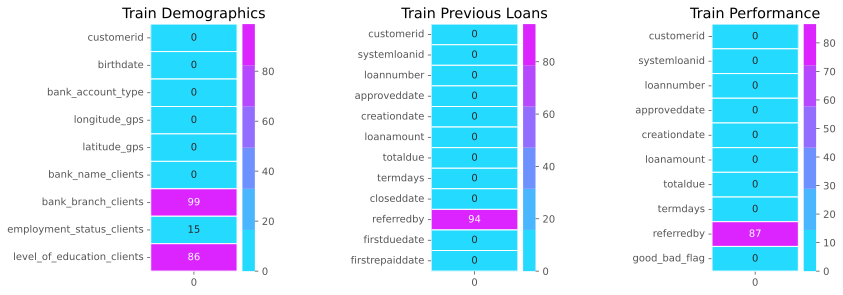

In [15]:
# TRAIN SETS
plt.figure(figsize=(12,10))

plt.subplot(231)
sns.heatmap(pd.DataFrame(traindemographics.isnull().sum()/traindemographics.shape[0]*100),annot=True,
            cmap=sns.color_palette("cool"),linewidth=1,linecolor="white")
plt.title("Train Demographics")

plt.subplot(232)
sns.heatmap(pd.DataFrame(trainprevloans.isnull().sum()/trainprevloans.shape[0]*100),annot=True,
            cmap=sns.color_palette("cool"),linewidth=1,linecolor="white")
plt.title("Train Previous Loans")

plt.subplot(233)
sns.heatmap(pd.DataFrame(trainperf.isnull().sum()/trainperf.shape[0]*100),annot=True,
            cmap=sns.color_palette("cool"),linewidth=1,linecolor="white")
plt.title("Train Performance")

plt.subplots_adjust(wspace = 1.6)

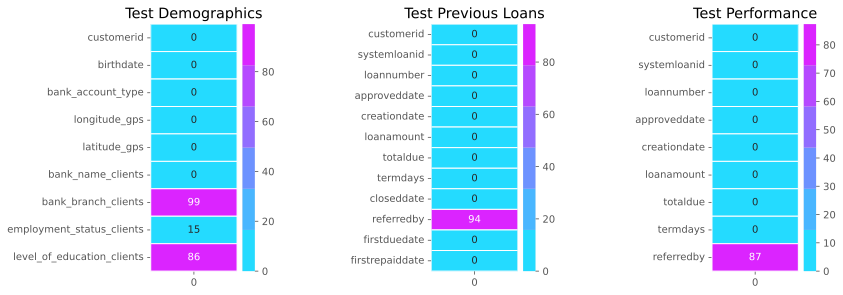

In [16]:
# TEST SETS
plt.figure(figsize=(12,10))

plt.subplot(231)
sns.heatmap(pd.DataFrame(testdemographics.isnull().sum()/testdemographics.shape[0]*100),annot=True,
            cmap=sns.color_palette("cool"),linewidth=1,linecolor="white")
plt.title("Test Demographics")

plt.subplot(232)
sns.heatmap(pd.DataFrame(testprevloans.isnull().sum()/testprevloans.shape[0]*100),annot=True,
            cmap=sns.color_palette("cool"),linewidth=1,linecolor="white")
plt.title("Test Previous Loans")

plt.subplot(233)
sns.heatmap(pd.DataFrame(testperf.isnull().sum()/testperf.shape[0]*100),annot=True,
            cmap=sns.color_palette("cool"),linewidth=1,linecolor="white")
plt.title("Test Performance")

plt.subplots_adjust(wspace = 1.6)

##### <b>7.1.6 Combine train and test set for easy preprocessing</b>

In [17]:
print('COMBINED DATAFRAME SHAPES\n')

# Combine train and test set
ntrainprevloans = trainprevloans.shape[0] # to be used to split train and test set from the combined dataframe
prevloans_data = pd.concat((trainprevloans, testprevloans)).reset_index(drop=True)

ntrainperf = trainperf.shape[0] # to be used to split train and test set from the combined dataframe
perf_data = pd.concat((trainperf, testperf)).reset_index(drop=True)

ntraindemographics = traindemographics.shape[0] # to be used to split train and test set from the combined dataframe
demographics_data = pd.concat((traindemographics, testdemographics)).reset_index(drop=True)


# Check the shape of the train and test sets
print(f'Previous Loans shape: {prevloans_data.shape}')
print(f'Performance shape: {perf_data.shape}')
print(f'Demographic shape: {demographics_data.shape}')

COMBINED DATAFRAME SHAPES

Previous Loans shape: (24090, 12)
Performance shape: (5818, 10)
Demographic shape: (5833, 9)


##### <b>7.1.7 Categorical Data</b>

In [18]:
# Change categorical column types to its appropriate datatype
demographics_num_cols = ['longitude_gps', 'latitude_gps']
demographics_cat_cols = [col for col in demographics_data.columns if col not in demographics_num_cols+['customerid', 'bank_branch_clients', 'birthdate']]

for col in demographics_data.columns:
  if col in demographics_cat_cols:
    demographics_data[col] = demographics_data[col].astype('category')

# Confirm whether the changes have been applied successfully
demographics_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5833 entries, 0 to 5832
Data columns (total 9 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   customerid                  5833 non-null   object        
 1   birthdate                   5833 non-null   datetime64[ns]
 2   bank_account_type           5833 non-null   category      
 3   longitude_gps               5833 non-null   float64       
 4   latitude_gps                5833 non-null   float64       
 5   bank_name_clients           5833 non-null   category      
 6   bank_branch_clients         65 non-null     object        
 7   employment_status_clients   4968 non-null   category      
 8   level_of_education_clients  797 non-null    category      
dtypes: category(4), datetime64[ns](1), float64(2), object(2)
memory usage: 252.0+ KB


Bank branch clients is omitted as it will be dropped in the filling in missing values section since it has more than 90% missing values.

Customerid will also not be used in data analysis as we will see in Model Building.

##### <b>7.1.8 Duplicates</b>

In [19]:
# check customerid - 'primary key' that will be used to merge other data sets and should be unique
demographics_data.duplicated().any()

True

In [20]:
demographics_data = demographics_data.drop_duplicates(subset='customerid', keep='first', inplace=False)

In [21]:
# checking if any duplicate customer id is left
demographics_data.duplicated().any()

False

##### <b>7.1.9 Filling in missing values</b>

Missing values can be filled using different strategies including: Mean, Max, Min, Median, sklearn SimpleImputer, or you can choose to drop null values.

The first step in this data preprocessing step was to drop variables with >80% missing data, which included 2 variables. Variables that would introduce data leakage into our models, such as 'referred_by' and 'bank_branch_clients' were dropped. These could potentially cause our models to overfit noise.

Based on a careful read of the provided data, certain categorical features were imputed using mode.

In [22]:
# Previous Loans
# drop 'referredby' column as it has over 90% missing values
prevloans_data = prevloans_data.drop(columns='referredby')

# Performance
# drop 'referredby' column as it has over 80% missing values
perf_data = perf_data.drop(columns='referredby')

# Demographics Data
# drop bank_branch_clients column since it has 99% missing values
demographics_data = demographics_data.drop(columns='bank_branch_clients')

# For cat cols fill in with mode 
for col in demographics_data.columns:
  if col in demographics_cat_cols:
    demographics_data[col] = demographics_data[col].fillna(demographics_data[col].mode()[0])

# confirm there aren't missing values
print('\nPrevious Loans\n')
display(prevloans_data.isna().sum())
print('\nPerformance\n')
display(perf_data.isna().sum())
print('\nDemographics\n')
display(demographics_data.isna().sum())


Previous Loans



customerid         0
systemloanid       0
loannumber         0
approveddate       0
creationdate       0
loanamount         0
totaldue           0
termdays           0
closeddate         0
firstduedate       0
firstrepaiddate    0
dtype: int64


Performance



customerid          0
systemloanid        0
loannumber          0
approveddate        0
creationdate        0
loanamount          0
totaldue            0
termdays            0
good_bad_flag    1450
dtype: int64


Demographics



customerid                    0
birthdate                     0
bank_account_type             0
longitude_gps                 0
latitude_gps                  0
bank_name_clients             0
employment_status_clients     0
level_of_education_clients    0
dtype: int64

'good_bad_flag' column in **Performance** has 1450 missing values since the test set had no 'good_bad_flag' column.

In [23]:
# Check the shape of the train and test sets
print(f'Previous Loans shape: {prevloans_data.shape}')
print(f'Performance shape: {perf_data.shape}')
print(f'Demographic shape: {demographics_data.shape}')

Previous Loans shape: (24090, 11)
Performance shape: (5818, 9)
Demographic shape: (5818, 8)


Post this data preprocessing, our previous loans dataset contained 11 features vs the 12 we started with.

### <b>8.0 Data Distribution</b>

Several interactive exploratory data analysis plots were created in order to build some high-level intuition of some of the relationships between different variables.

#### <b>8.1 Target Variable</b>

In [24]:
perf_data['good_bad_flag'].value_counts()

Good    3416
Bad      952
Name: good_bad_flag, dtype: int64

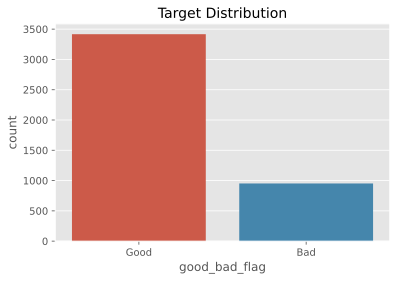

In [25]:
sns.countplot(perf_data['good_bad_flag'])
plt.title('Target Distribution', fontdict={'size':14});

#### <b>8.2 Demographics</b>

##### <b>8.2.1 Bank Account Type</b>

In [26]:
demographics_data['bank_account_type'].value_counts()

Savings    4570
Other      1168
Current      80
Name: bank_account_type, dtype: int64

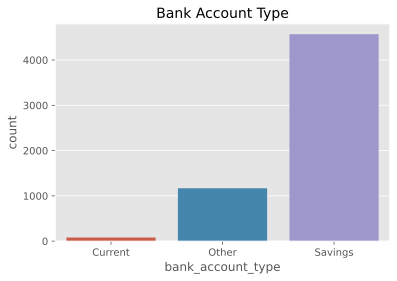

In [27]:
sns.countplot(demographics_data['bank_account_type'])
plt.title('Bank Account Type', fontdict={'size':14});

##### <b>8.2.2 Longitude and Latitude</b>

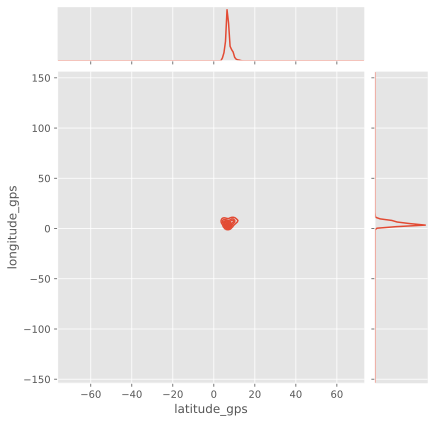

In [28]:
sns.jointplot(x="latitude_gps", y="longitude_gps", data=demographics_data, kind="kde")

This graph seems to have errors with outliers overwriting the data at around 0

In [29]:
demographics_data['longitude_gps'].describe()

count   5,818.00
mean        4.58
std         6.98
min      -149.03
25%         3.35
50%         3.59
75%         6.56
max       151.21
Name: longitude_gps, dtype: float64

Here the mean is approximately 4.58, the standard deviation 6.98, but the minimum value is -149.03 while maximum is at 151.21. 

We need to standardize these data points.

In [30]:
demographics_data["longitude_gps"] = demographics_data["longitude_gps"] \
                                .where(demographics_data["longitude_gps"] < 20)\
                                .where(demographics_data["longitude_gps"] > -20)

Do the same for latitude gps

In [31]:
demographics_data['latitude_gps'].describe()

count   5,818.00
mean        7.22
std         3.05
min       -74.01
25%         6.47
50%         6.62
75%         7.43
max        71.23
Name: latitude_gps, dtype: float64

In [32]:
demographics_data["latitude_gps"] = demographics_data["latitude_gps"]\
                            .where(demographics_data["latitude_gps"] < 20)\
                            .where(demographics_data["latitude_gps"] > -20)

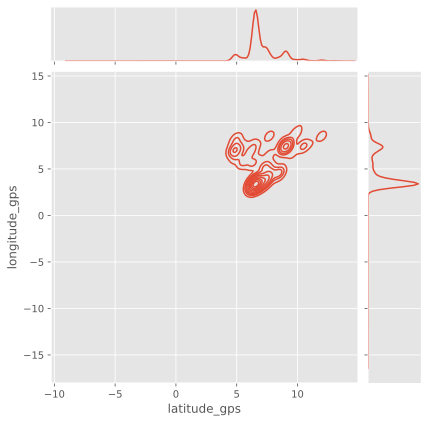

In [33]:
sns.jointplot(x="latitude_gps", y="longitude_gps", data=demographics_data, kind="kde")

##### <b>8.2.3 Bank Name Clients</b>

In [34]:
demographics_data['bank_name_clients'].value_counts()

GT Bank               2128
First Bank             790
Access Bank            567
UBA                    461
Zenith Bank            412
Diamond Bank           392
EcoBank                202
Stanbic IBTC           193
FCMB                   168
Skye Bank              146
Fidelity Bank          139
Sterling Bank           67
Wema Bank               37
Union Bank              36
Heritage Bank           27
Keystone Bank           25
Standard Chartered      19
Unity Bank               9
Name: bank_name_clients, dtype: int64

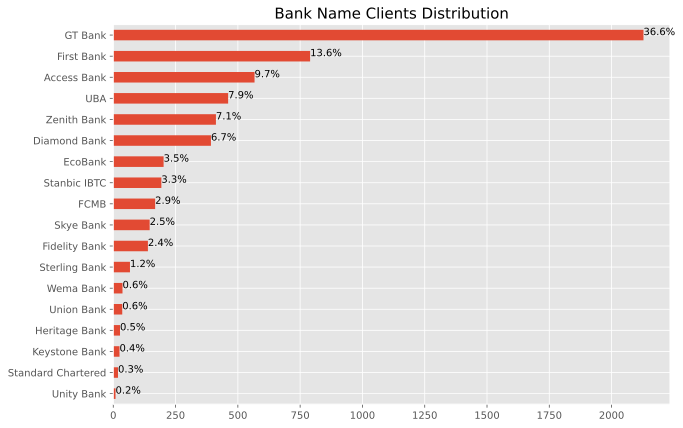

In [35]:
# Bank name clients distribution 
ax = demographics_data['bank_name_clients'].value_counts().sort_values().plot(kind = 'barh', figsize=(10,7))
plt.title('Bank Name Clients Distribution', fontdict={'size': 15})
for p in ax.patches:
  percentage ='{:,.1f}%'.format((p.get_width()/demographics_data.shape[0])*100)
  width, height =p.get_width(),p.get_height()
  x=p.get_x()+width+0.02
  y=p.get_y()+height/2
  ax.annotate(percentage,(x,y))

##### <b>8.2.4 Employment Status Clients</b>

In [36]:
demographics_data['employment_status_clients'].value_counts()

Permanent        5070
Self-Employed     470
Student           189
Unemployed         79
Retired             8
Contract            2
Name: employment_status_clients, dtype: int64

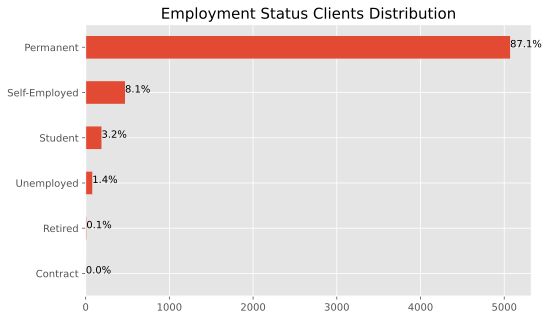

In [37]:
# Bank name clients distribution 
ax = demographics_data['employment_status_clients'].value_counts().sort_values().plot(kind = 'barh', figsize=(8,5))
plt.title('Employment Status Clients Distribution', fontdict={'size': 15})
for p in ax.patches:
  percentage ='{:,.1f}%'.format((p.get_width()/demographics_data.shape[0])*100)
  width, height =p.get_width(),p.get_height()
  x=p.get_x()+width+0.02
  y=p.get_y()+height/2
  ax.annotate(percentage,(x,y))

##### <b>8.2.5 Level of education of clients</b>

In [38]:
demographics_data['level_of_education_clients'].value_counts()

Graduate         5599
Secondary         118
Post-Graduate      90
Primary            11
Name: level_of_education_clients, dtype: int64

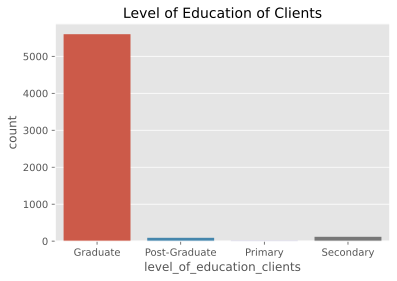

In [39]:
sns.countplot(demographics_data['level_of_education_clients'])
plt.title('Level of Education of Clients', fontdict={'size':14});

##### <b>8.2.6 Cross tab between bank account type and employment status clients</b>

In [40]:
# previewing cross tab of employment status and bank account type
pd_crosstab = pd.crosstab(demographics_data.employment_status_clients, demographics_data.bank_account_type, margins=True)
pd_crosstab

bank_account_type          Current  Other  Savings   All
employment_status_clients                               
Contract                         1      0        1     2
Permanent                       78    747     4245  5070
Retired                          0      2        6     8
Self-Employed                    1    321      148   470
Student                          0     73      116   189
Unemployed                       0     25       54    79
All                             80   1168     4570  5818

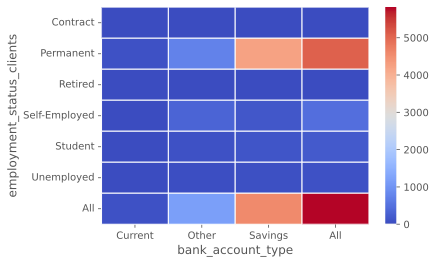

<Figure size 432x288 with 0 Axes>

In [41]:
# plot heatmap of the table 
sns.heatmap(pd_crosstab, cbar=True, cmap="coolwarm", linewidths=1)
plt.show()
plt.clf()

##### <b>8.2.7 Summary of unique values per categorical column</b>

In [42]:
# Check unique values for each categorical column
for col in demographics_cat_cols:
  print(col)
  print(demographics_data[col].unique(), '\n')

bank_account_type
['Savings', 'Other', 'Current']
Categories (3, object): ['Savings', 'Other', 'Current'] 

bank_name_clients
['GT Bank', 'Sterling Bank', 'Fidelity Bank', 'Access Bank', 'EcoBank', ..., 'Standard Chartered', 'Heritage Bank', 'Keystone Bank', 'Unity Bank', 'Wema Bank']
Length: 18
Categories (18, object): ['GT Bank', 'Sterling Bank', 'Fidelity Bank', 'Access Bank', ...,
                          'Heritage Bank', 'Keystone Bank', 'Unity Bank', 'Wema Bank'] 

employment_status_clients
['Permanent', 'Student', 'Self-Employed', 'Unemployed', 'Retired', 'Contract']
Categories (6, object): ['Permanent', 'Student', 'Self-Employed', 'Unemployed', 'Retired',
                         'Contract'] 

level_of_education_clients
['Graduate', 'Secondary', 'Post-Graduate', 'Primary']
Categories (4, object): ['Graduate', 'Secondary', 'Post-Graduate', 'Primary'] 



#### <b>8.3 Performance</b>

With the two distinct classes for 'Good' and 'Bad' loans defined, we can look into variables and plot the histograms to see if they correspond to different distributions.

In [43]:
df_good = perf_data.loc[(perf_data['good_bad_flag'] == 'Good')]
df_bad = perf_data.loc[(perf_data['good_bad_flag'] == 'Bad')]

In [44]:
df_good.shape[0]

3416

In [45]:
df_bad.shape[0]

952

##### <b>8.3.1 Days Between Account Creation and Loan Approval</b>

###### <b>8.3.1.1 Date Loan Approved</b>

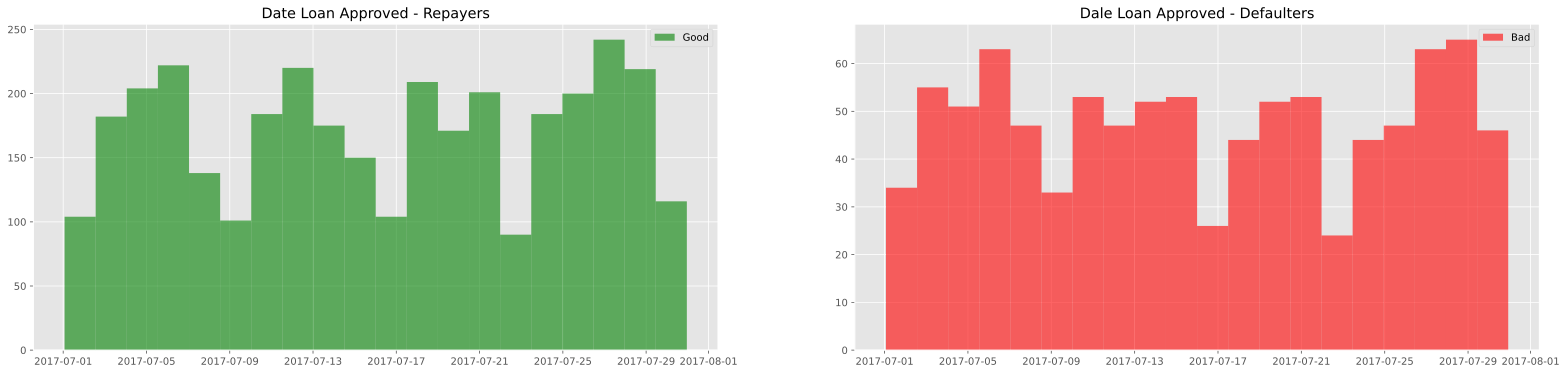

In [46]:
# Date loan approved
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(27,6))
df_good.approveddate.hist(bins=20, ax=ax1, label='Good', color='green', alpha=0.6)
df_bad.approveddate.hist(bins=20, ax=ax2, label='Bad', color='red', alpha=0.6)
ax1.set_title('Date Loan Approved - Repayers')
ax2.set_title('Dale Loan Approved - Defaulters')
ax1.legend()
ax2.legend()
plt.show()

###### <b>8.3.1.2 Date Account Created</b>

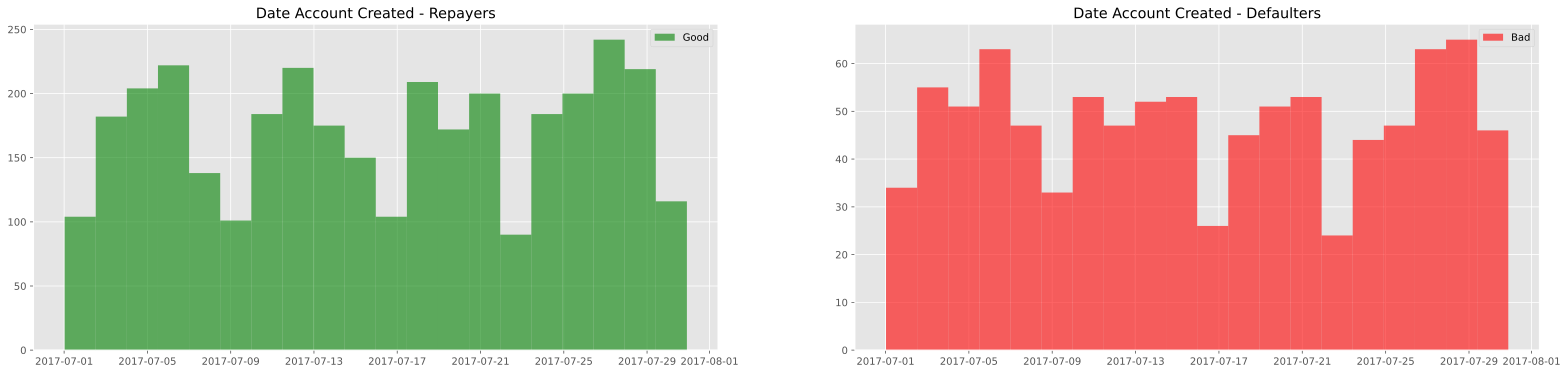

In [47]:
# date account created
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(27,6))
df_good.creationdate.hist(bins=20, ax=ax1, label='Good', color='green', alpha=0.6)
df_bad.creationdate.hist(bins=20, ax=ax2, label='Bad', color='red', alpha=0.6)
ax1.set_title('Date Account Created - Repayers')
ax2.set_title('Date Account Created - Defaulters')
ax1.legend()
ax2.legend()
plt.show()

###### **8.3.1.3 Loan Approval Time**

In [48]:
df_good['days_between'] = df_good['approveddate'] - df_good['creationdate']
df_bad['days_between'] = df_bad['approveddate'] - df_bad['creationdate']

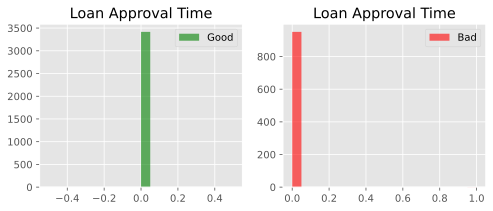

In [49]:
# days_between
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(8, 3))
df_good['days_between'].dt.days.hist(bins=20, ax=ax1, label='Good', color='green', alpha=0.6)
df_bad['days_between'].dt.days.hist(bins=20, ax=ax2, label='Bad', color='red', alpha=0.6)
ax1.set_title('Loan Approval Time')
ax2.set_title('Loan Approval Time')
ax1.legend()
ax2.legend()
plt.show()

##### <b>8.3.2 Loan Amount</b>

In [50]:
print('Max:', perf_data['loanamount'].max())
print('Min:', perf_data['loanamount'].min())
print('Mean:', perf_data['loanamount'].mean())
print('Median:', perf_data['loanamount'].median())

Max: 60000.0
Min: 10000.0
Mean: 17727.74149192162
Median: 10000.0


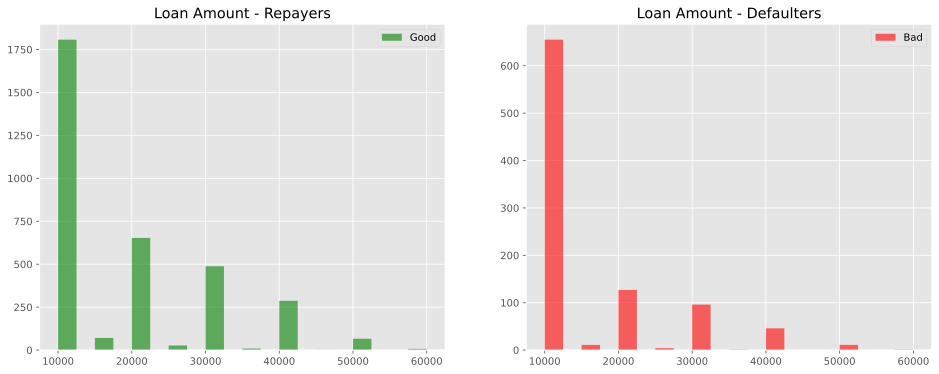

In [51]:
#  Amount
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))
df_good['loanamount'].hist(bins=20, ax=ax1, label='Good', color='green', alpha=0.6)
df_bad['loanamount'].hist(bins=20, ax=ax2, label='Bad', color='red', alpha=0.6)
ax1.set_title('Loan Amount - Repayers')
ax2.set_title('Loan Amount - Defaulters')
ax1.legend()
ax2.legend()
plt.show()

##### **8.3.3 Total Due**

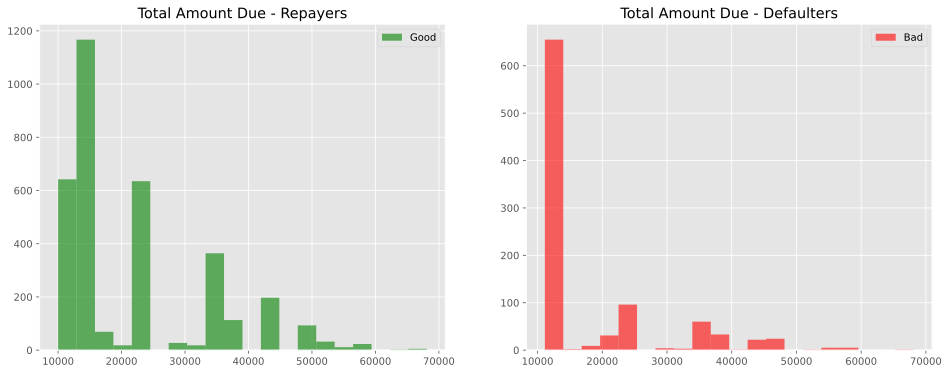

In [52]:
#  Total Due
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))
df_good['totaldue'].hist(bins=20, ax=ax1, label='Good', color='green', alpha=0.6)
df_bad['totaldue'].hist(bins=20, ax=ax2, label='Bad', color='red', alpha=0.6)
ax1.set_title('Total Amount Due - Repayers')
ax2.set_title('Total Amount Due - Defaulters')
ax1.legend()
ax2.legend()
plt.show()

##### **8.4.4 Profit**

In [53]:
df_good['profit']=df_good['totaldue']-df_good['loanamount']
df_bad['profit']=df_bad['totaldue']-df_bad['loanamount']

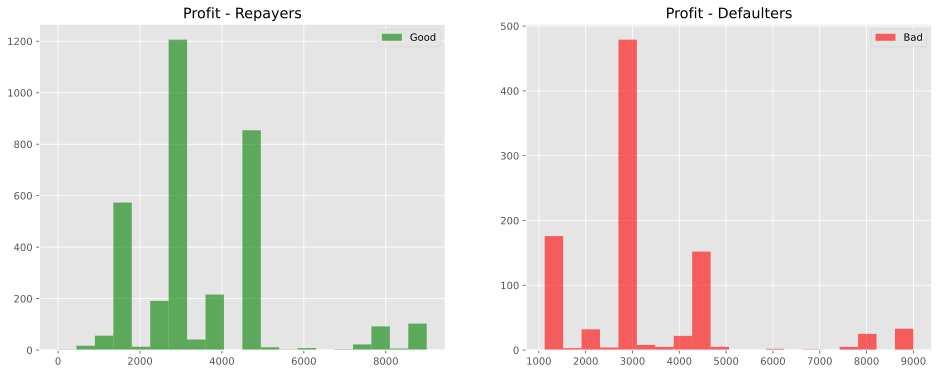

In [54]:
# Profit
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))
df_good.profit.hist(bins=20, ax=ax1, label='Good', color='green', alpha=0.6)
df_bad.profit.hist(bins=20, ax=ax2, label='Bad', color='red', alpha=0.6)
ax1.set_title('Profit - Repayers')
ax2.set_title('Profit - Defaulters')
ax1.legend()
ax2.legend()
plt.show()

##### <b>8.3.5 Loan Duration</b>

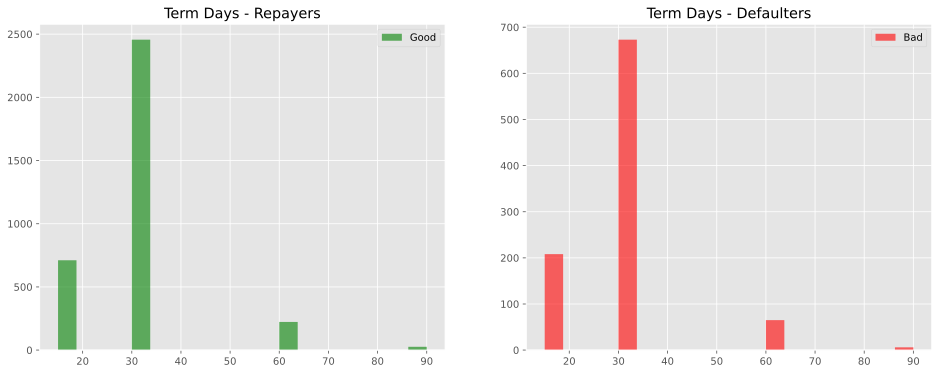

In [55]:
# term days
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))
df_good.termdays.hist(bins=20, ax=ax1, label='Good', color='green', alpha=0.6)
df_bad.termdays.hist(bins=20, ax=ax2, label='Bad', color='red', alpha=0.6)
ax1.set_title('Term Days - Repayers')
ax2.set_title('Term Days - Defaulters')
ax1.legend()
ax2.legend()
plt.show()

#### <b>8.4 Previous Loans

##### **8.4.1 Loan Approval Time**

In [56]:
# days between account creation and loan approval
temp_df = prevloans_data
temp_df['days_between_acc_app'] = temp_df['approveddate'] - temp_df['creationdate']

In [57]:
temp_df['days_between_acc_app'].dt.days.value_counts()

0    24075
1       14
2        1
Name: days_between_acc_app, dtype: int64

Text(0.5, 1.0, 'Days Between Account Creation and Loan Approval')

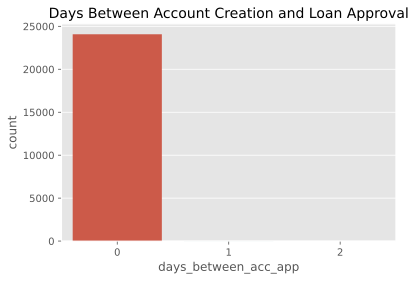

In [58]:
# Days between
sns.countplot(temp_df['days_between_acc_app'].dt.days)
plt.title('Days Between Account Creation and Loan Approval', fontdict={'size':14})

##### **8.4.2 Loan Amount**

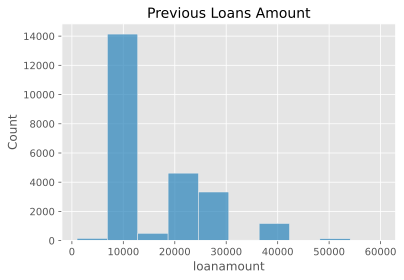

In [59]:
sns.histplot(prevloans_data['loanamount'], bins=10)
plt.title('Previous Loans Amount', fontdict={'size':14});

##### **8.4.3 Total Due**

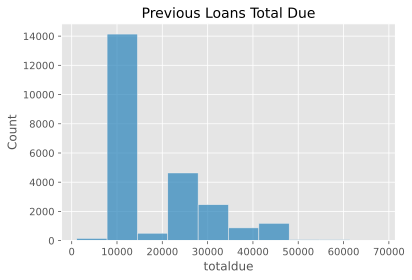

In [60]:
# total due
sns.histplot(prevloans_data['totaldue'], bins=10)
plt.title('Previous Loans Total Due', fontdict={'size':14});

##### **8.4.4 Profit**

In [61]:
prevloans_data['profit']=prevloans_data['totaldue']-prevloans_data['loanamount']

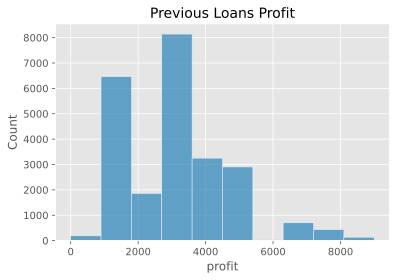

In [62]:
# profit
sns.histplot(prevloans_data['profit'], bins=10)
plt.title('Previous Loans Profit', fontdict={'size':14});

##### **8.4.5 Loan Duration**

Text(0.5, 1.0, 'Previous Loans Term Days')

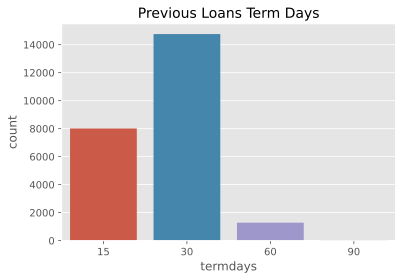

In [63]:
# term days
sns.countplot(prevloans_data['termdays'])
plt.title('Previous Loans Term Days', fontdict={'size':14})

##### **8.4.6 Days between account creation and closed date**

In [64]:
temp_df = prevloans_data
temp_df['days_between_acc_clo'] = temp_df['closeddate'] - temp_df['creationdate']

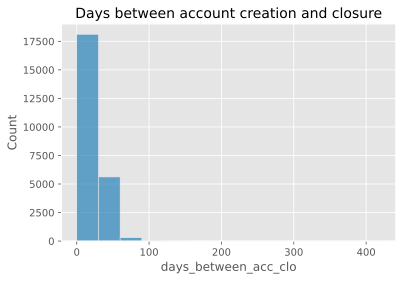

In [65]:
sns.histplot(temp_df['days_between_acc_clo'].dt.days, binwidth=30)
plt.title('Days between account creation and closure', fontdict={'size':14});

##### **8.4.7 Return Days**

In [66]:
temp_df = prevloans_data
temp_df['days_between_app_clo'] = temp_df['closeddate'] - temp_df['approveddate']
temp_df['days_left']=temp_df.termdays-temp_df['days_between_app_clo'].dt.days

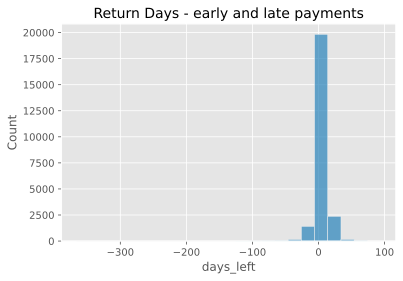

In [67]:
sns.histplot(temp_df['days_left'], binwidth=20)
plt.title('Return Days - early and late payments', fontdict={'size':14});

##### **8.4.8 Early Payment**

In [68]:
earlypayment = temp_df.pivot_table(values='days_left', index='customerid', aggfunc=lambda x:(x>=0).sum())
earlypayment.rename(columns={'days_left':'earlypayment'},inplace=True)

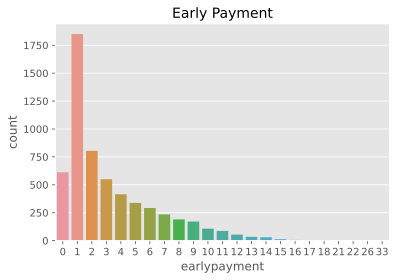

In [69]:
# Early Payment
sns.countplot(earlypayment['earlypayment'])
plt.title('Early Payment', fontdict={'size':14});

##### **8.4.9 Exceeded Days**

In [70]:
exceeded_days = temp_df.pivot_table(values='days_left', index='customerid', aggfunc=lambda x:(x<0).sum())
exceeded_days.rename(columns={'days_left':'exceeded_days'},inplace=True)

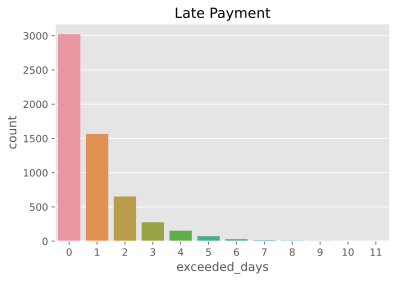

In [71]:
# Exceeded Days
sns.countplot(exceeded_days['exceeded_days'])
plt.title('Late Payment', fontdict={'size':14});

##### <b>8.4.10 Days Between Due Date and Repaid Date

In [72]:
# days between due date and repaid date
temp_df = prevloans_data
temp_df['days_between'] = temp_df['firstrepaiddate'] - temp_df['firstduedate']

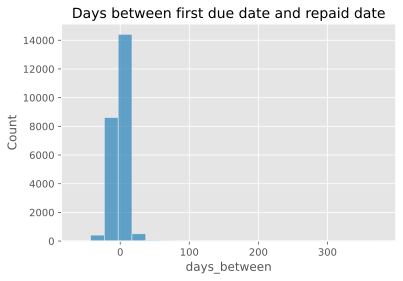

In [73]:
sns.histplot(temp_df['days_between'].dt.days, binwidth=20)
plt.title('Days between first due date and repaid date', fontdict={'size':14});

### <b>9.0 Training Data</b>

In [74]:
# Split combined data
prevloanstrain = prevloans_data[:ntrainprevloans]
prevloanstest = prevloans_data[ntrainprevloans:]
perftrain = perf_data[:ntrainperf]
perftest = perf_data[ntrainperf:]
demographicstrain = demographics_data[:ntraindemographics]
demographicstest = demographics_data[ntraindemographics:]
print('Previous loans train shape:', prevloanstrain.shape)
print('Previous loans test shape:', prevloanstest.shape)
print('Performance train shape:', perftrain.shape)
print('Performance test shape:', perftest.shape)
print('Demographics train shape:', demographicstrain.shape)
print('Demographics test shape:', demographicstest.shape)

Previous loans train shape: (18183, 17)
Previous loans test shape: (5907, 17)
Performance train shape: (4368, 9)
Performance test shape: (1450, 9)
Demographics train shape: (4346, 8)
Demographics test shape: (1472, 8)


In [75]:
# Tag data with a set column on whether it is train or test set
prevloanstrain['set'] = 'train'
prevloanstrain['set'] = 'test'
perftrain['set'] = 'train'
perftrain['set'] = 'test'
demographicstrain['set'] = 'train'
demographicstrain['set'] = 'test'

In [76]:
# Merge datasets
Tdemographics=pd.concat([demographicstrain,demographicstest])
Tperformance=pd.concat([perftrain,perftest])
Tprevloans=pd.concat([prevloanstrain,prevloanstest])

In [77]:
# format the target variable data has to 1 for good and 0 bad
Tperformance.good_bad_flag=Tperformance.good_bad_flag.map({'Good':1,'Bad':0})

### <b>10.0 Feature Engineering</b>



#### <b>10.1 Tdemographics</b>

Let's first preview the dataframe and confirm if there are any duplicates

In [78]:
Tdemographics.columns

Index(['customerid', 'birthdate', 'bank_account_type', 'longitude_gps',
       'latitude_gps', 'bank_name_clients', 'employment_status_clients',
       'level_of_education_clients', 'set'],
      dtype='object')

In [79]:
Tdemographics.head(3)

customerid  birthdate bank_account_type  \
0  8a858e135cb22031015cbafc76964ebd 1973-10-10           Savings   
1  8a858e275c7ea5ec015c82482d7c3996 1986-01-21           Savings   
2  8a858e5b5bd99460015bdc95cd485634 1987-04-01           Savings   

   longitude_gps  latitude_gps bank_name_clients employment_status_clients  \
0           3.32          6.53           GT Bank                 Permanent   
1           3.33          7.12     Sterling Bank                 Permanent   
2           5.75          5.56     Fidelity Bank                 Permanent   

  level_of_education_clients   set  
0                   Graduate  test  
1                   Graduate  test  
2                   Graduate  test

In [80]:
Tdemographics.duplicated().any()

False

##### **10.1.1 Age**

In [81]:
# we can get age from birthdate
Tdemographics['Age']=2021-Tdemographics.birthdate.dt.year

# creating label groups for different categories
Tdemographics.Age=pd.cut(Tdemographics.Age,[0,13,31,51,100],labels=['ChildAge','YoungAge','MiddleAge','SeniorAge'])

# preview results
print('Unique values:')
display(Tdemographics.Age.unique())
print('\nValue counts:')
display(Tdemographics.Age.value_counts())

Unique values:


['MiddleAge', 'YoungAge', 'SeniorAge']
Categories (3, object): ['YoungAge' < 'MiddleAge' < 'SeniorAge']


Value counts:


MiddleAge    4565
YoungAge     1116
SeniorAge     137
ChildAge        0
Name: Age, dtype: int64

##### **10.1.2 Bank Account Type**

In [82]:
Tdemographics["bank_account_type"].value_counts()

Savings    4570
Other      1168
Current      80
Name: bank_account_type, dtype: int64

In [83]:
mapper = {'Current':'Other'}
demographics_data['bank_account_type'] = demographics_data['bank_account_type'].replace(mapper)

# Confirm mappings
demographics_data['bank_account_type'].value_counts()

Savings    4570
Other      1248
Name: bank_account_type, dtype: int64

##### **10.1.3 Bank Name Clients**

In [84]:
Tdemographics["bank_name_clients"].value_counts()

GT Bank               2128
First Bank             790
Access Bank            567
UBA                    461
Zenith Bank            412
Diamond Bank           392
EcoBank                202
Stanbic IBTC           193
FCMB                   168
Skye Bank              146
Fidelity Bank          139
Sterling Bank           67
Wema Bank               37
Union Bank              36
Heritage Bank           27
Keystone Bank           25
Standard Chartered      19
Unity Bank               9
Name: bank_name_clients, dtype: int64

The bank names are pretty useless at this point, so we will use external data such as liquidity ratios in order to use it in our algorithm.

In [85]:
path = 'drive/My Drive/Y4_T1/Research/external_data'
liquidity_ratio = pd.read_csv(path + "/Nigerian_Banks_Liquidity_Ratio.csv", sep=';')  # from Christine - I've just changed this to my current path

In [86]:
liquidity_ratio.head()

S_N         Bank  Return_On_Equity  Return_On_Asset  Current_Ratio  \
0    1   First Bank              0.10             0.01           1.12   
1    2          UBA              0.10             0.01           1.04   
2    3  Zenith Bank              0.09             0.03           1.12   
3    4      GT Bank              0.24             0.04           0.99   
4    5  Access Bank              0.04             0.00           1.14   

   Liquid_to_asset_Ratio  Loan_to_Deposit  Cash_to_Deposit  Loan_to_Asset  
0                   0.96             0.89             0.08           0.65  
1                   0.93             0.49             0.33           0.34  
2                   0.93             0.64             0.14           0.47  
3                   0.82             0.71             0.32           0.47  
4                   0.91             0.66             0.09           0.47

In [87]:
# Merge the two datasets using name of the banks as the primary key
Tdemographics = pd.merge(Tdemographics, liquidity_ratio, how = 'left', left_on = 'bank_name_clients', right_on = 'Bank')

In [88]:
Tdemographics.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5818 entries, 0 to 5817
Data columns (total 19 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   customerid                  5818 non-null   object        
 1   birthdate                   5818 non-null   datetime64[ns]
 2   bank_account_type           5818 non-null   category      
 3   longitude_gps               5789 non-null   float64       
 4   latitude_gps                5785 non-null   float64       
 5   bank_name_clients           5818 non-null   object        
 6   employment_status_clients   5818 non-null   category      
 7   level_of_education_clients  5818 non-null   category      
 8   set                         4346 non-null   object        
 9   Age                         5818 non-null   category      
 10  S_N                         5579 non-null   float64       
 11  Bank                        5579 non-null   object      

In [89]:
# check which banks did not have matches
Tdemographics[Tdemographics["Current_Ratio"].isnull()]["bank_name_clients"].unique()

array(['FCMB', 'Standard Chartered', 'Heritage Bank', 'Keystone Bank'],
      dtype=object)

These four banks do not exist in the liquidity ratio dataset. 

We can add another table to describe these banks.

In [90]:
deposit_banks = pd.read_csv(path + "/Nigerian_Deposit_Commercial_Banks.csv", sep=';')

In [91]:
deposit_banks.head()

Bank names  Status  Time  Merger  Age  Revenue   Asset 
0       Access Bank       0    10       0   26   258.00 2,590.00
1     AfribankPlc*        1     7       0   52     0.24 1,010.00
2      Diamond Bank       0    10       1   25     6.22 1,750.00
3           EcoBank       0    10       0   29   542.71 1,770.00
4  Equitorial Trust       1     7       1   21     0.15     0.00

In [92]:
Tdemographics = pd.merge(Tdemographics, deposit_banks, how = 'left', left_on = 'bank_name_clients', right_on = 'Bank names')

In [93]:
Tdemographics.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5818 entries, 0 to 5817
Data columns (total 26 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   customerid                  5818 non-null   object        
 1   birthdate                   5818 non-null   datetime64[ns]
 2   bank_account_type           5818 non-null   category      
 3   longitude_gps               5789 non-null   float64       
 4   latitude_gps                5785 non-null   float64       
 5   bank_name_clients           5818 non-null   object        
 6   employment_status_clients   5818 non-null   category      
 7   level_of_education_clients  5818 non-null   category      
 8   set                         4346 non-null   object        
 9   Age_x                       5818 non-null   category      
 10  S_N                         5579 non-null   float64       
 11  Bank                        5579 non-null   object      

In [94]:
# check which banks did not have matches
Tdemographics[Tdemographics["Age_y"].isnull()]["bank_name_clients"].unique()

array(['Stanbic IBTC', 'Heritage Bank', 'Keystone Bank'], dtype=object)

There are 3 banks missing matches. 

In [95]:
# preview dataset outcome
Tdemographics.head()

customerid  birthdate bank_account_type  \
0  8a858e135cb22031015cbafc76964ebd 1973-10-10           Savings   
1  8a858e275c7ea5ec015c82482d7c3996 1986-01-21           Savings   
2  8a858e5b5bd99460015bdc95cd485634 1987-04-01           Savings   
3  8a858efd5ca70688015cabd1f1e94b55 1991-07-19           Savings   
4  8a858e785acd3412015acd48f4920d04 1982-11-22           Savings   

   longitude_gps  latitude_gps bank_name_clients employment_status_clients  \
0           3.32          6.53           GT Bank                 Permanent   
1           3.33          7.12     Sterling Bank                 Permanent   
2           5.75          5.56     Fidelity Bank                 Permanent   
3           3.36          6.64           GT Bank                 Permanent   
4           8.46         11.97           GT Bank                 Permanent   

  level_of_education_clients   set      Age_x  S_N           Bank  \
0                   Graduate  test  MiddleAge 4.00        GT Bank   
1                   Graduate  test  MiddleAge 8.00  Sterling Bank   
2                   Graduate  test  MiddleAge 7.00  Fidelity Bank   
3                   Graduate  test   YoungAge 4.00        GT Bank   
4                   Graduate  test  MiddleAge 4.00        GT Bank   

   Return_On_Equity  Return_On_Asset  Current_Ratio  Liquid_to_asset_Ratio  \
0              0.24             0.04           0.99                   0.82   
1              0.16             0.01           0.81                   0.74   
2              0.07             0.01           1.24                   0.93   
3              0.24             0.04           0.99                   0.82   
4              0.24             0.04           0.99                   0.82   

   Loan_to_Deposit  Cash_to_Deposit  Loan_to_Asset     Bank names  Status  \
0             0.71             0.32           0.47        GT Bank    0.00   
1             0.46             0.11           0.36  Sterling Bank    0.00   
2             0.79             0.13           0.56  Fidelity Bank    0.00   
3             0.71             0.32           0.47        GT Bank    0.00   
4             0.71             0.32           0.47        GT Bank    0.00   

   Time  Merger  Age_y  Revenue   Asset   
0 10.00    0.00  25.00   280.10 2,520.00  
1 10.00    1.00  56.00   130.60   799.50  
2 10.00    0.00  27.00   146.90 1,232.00  
3 10.00    0.00  25.00   280.10 2,520.00  
4 10.00    0.00  25.00   280.10 2,520.00

In [96]:
# dropping irrelevant data entries
Tdemographics.drop(columns=['bank_name_clients','birthdate','Bank','Bank names'],axis=1,inplace=True)

##### **10.1.4 Employment Status Clients**

In [97]:
Tdemographics["employment_status_clients"].value_counts()

Permanent        5070
Self-Employed     470
Student           189
Unemployed         79
Retired             8
Contract            2
Name: employment_status_clients, dtype: int64

##### **10.1.5 Level of education of clients**

In [98]:
Tdemographics["level_of_education_clients"].value_counts()

Graduate         5599
Secondary         118
Post-Graduate      90
Primary            11
Name: level_of_education_clients, dtype: int64

#### **10.2 Tpreviousloans**

Let's first preview the dataframe and confirm if there are any duplicates

In [99]:
Tprevloans.columns

Index(['customerid', 'systemloanid', 'loannumber', 'approveddate',
       'creationdate', 'loanamount', 'totaldue', 'termdays', 'closeddate',
       'firstduedate', 'firstrepaiddate', 'days_between_acc_app', 'profit',
       'days_between_acc_clo', 'days_between_app_clo', 'days_left',
       'days_between', 'set'],
      dtype='object')

In [100]:
# previewing first 5 rows
Tprevloans.head()

customerid  systemloanid  loannumber  \
0  8a2a81a74ce8c05d014cfb32a0da1049     301682320           2   
1  8a2a81a74ce8c05d014cfb32a0da1049     301883808           9   
2  8a2a81a74ce8c05d014cfb32a0da1049     301831714           8   
3  8a8588f35438fe12015444567666018e     301861541           5   
4  8a85890754145ace015429211b513e16     301941754           2   

         approveddate        creationdate  loanamount  totaldue  termdays  \
0 2016-08-15 18:22:40 2016-08-15 17:22:32   10,000.00 13,000.00        30   
1 2017-04-28 18:39:07 2017-04-28 17:38:53   10,000.00 13,000.00        30   
2 2017-03-05 10:56:25 2017-03-05 09:56:19   20,000.00 23,800.00        30   
3 2017-04-09 18:25:55 2017-04-09 17:25:42   10,000.00 11,500.00        15   
4 2017-06-17 09:29:57 2017-06-17 08:29:50   10,000.00 11,500.00        15   

           closeddate firstduedate     firstrepaiddate days_between_acc_app  \
0 2016-09-01 16:06:48   2016-09-14 2016-09-01 15:51:43      0 days 01:00:08   
1 2017-05-28 14:44:49   2017-05-30 2017-05-26 00:00:00      0 days 01:00:14   
2 2017-04-26 22:18:56   2017-04-04 2017-04-26 22:03:47      0 days 01:00:06   
3 2017-04-24 01:35:52   2017-04-24 2017-04-24 00:48:43      0 days 01:00:13   
4 2017-07-14 21:18:43   2017-07-03 2017-07-14 21:08:35      0 days 01:00:07   

    profit days_between_acc_clo days_between_app_clo  days_left  \
0 3,000.00     16 days 22:44:16     16 days 21:44:08         14   
1 3,000.00     29 days 21:05:56     29 days 20:05:42          1   
2 3,800.00     52 days 12:22:37     52 days 11:22:31        -22   
3 1,500.00     14 days 08:10:10     14 days 07:09:57          1   
4 1,500.00     27 days 12:48:53     27 days 11:48:46        -12   

        days_between   set  
0 -13 days +15:51:43  test  
1  -4 days +00:00:00  test  
2   22 days 22:03:47  test  
3    0 days 00:48:43  test  
4   11 days 21:08:35  test

In [101]:
# check for duplicates
Tprevloans.duplicated().any()

False

##### **10.2.1 Profit**

In [102]:
Tprevloans['profit']=Tprevloans['totaldue']-Tprevloans['loanamount']

In [103]:
display(Tprevloans.profit.head(10))

0   3,000.00
1   3,000.00
2   3,800.00
3   1,500.00
4   1,500.00
5   3,800.00
6   9,000.00
7   4,500.00
8   3,000.00
9   1,500.00
Name: profit, dtype: float64

##### **10.2.2 Return Days**

In [104]:
Tprevloans['return_days']=Tprevloans.closeddate-Tprevloans.approveddate
Tprevloans['return_days']=Tprevloans['return_days'].apply(lambda x:int(str(x)[:2]))

In [105]:
Tprevloans.return_days.head(10)

0    16
1    29
2    52
3    14
4    27
5    29
6    29
7    32
8    27
9    14
Name: return_days, dtype: int64

##### **10.2.3 Days Exceeded**

In [106]:
Tprevloans['days_exceeded']=Tprevloans.termdays-Tprevloans.return_days

In [107]:
Tprevloans.days_exceeded.head(10)

0    14
1     1
2   -22
3     1
4   -12
5     1
6    31
7    -2
8     3
9     1
Name: days_exceeded, dtype: int64

##### **10.2.4 Total Profit - Each Customer**

In [108]:
total_profit = Tprevloans.pivot_table(values='profit', index='customerid', aggfunc=sum)
total_profit.rename(columns={'profit':'total_profit'}, inplace=True)

In [109]:
total_profit.head(3)

total_profit
customerid                                    
8a1088a0484472eb01484669e3ce4e0b      1,500.00
8a1a1e7e4f707f8b014f797718316cad     19,500.00
8a1a32fc49b632520149c3b8fdf85139     16,500.00

##### **10.2.5 Average Profit per Customer**

In [110]:
avg_profit = Tprevloans.pivot_table(values='profit', index='customerid', aggfunc=np.mean)
avg_profit.rename(columns={'profit':'avg_profit'}, inplace=True)

In [111]:
avg_profit.head(3)

avg_profit
customerid                                  
8a1088a0484472eb01484669e3ce4e0b    1,500.00
8a1a1e7e4f707f8b014f797718316cad    4,875.00
8a1a32fc49b632520149c3b8fdf85139    2,357.14

##### **10.2.6 Average Loan Amount per Customer**

In [112]:
avg_loanamount=Tprevloans.pivot_table(values='loanamount',index='customerid',aggfunc=np.mean)
avg_loanamount.rename(columns={'loanamount':'avg_loanamount'},inplace=True)

In [113]:
avg_loanamount.head(3)

avg_loanamount
customerid                                      
8a1088a0484472eb01484669e3ce4e0b       10,000.00
8a1a1e7e4f707f8b014f797718316cad       17,500.00
8a1a32fc49b632520149c3b8fdf85139       12,857.14

##### <b>10.2.7 Average Term Days

In [114]:
avg_termdays=Tprevloans.pivot_table(values='termdays',index='customerid',aggfunc=np.mean)
avg_termdays.rename(columns={'termdays':'avg_termdays'},inplace=True)

In [115]:
avg_termdays.head(3)

avg_termdays
customerid                                    
8a1088a0484472eb01484669e3ce4e0b         15.00
8a1a1e7e4f707f8b014f797718316cad         37.50
8a1a32fc49b632520149c3b8fdf85139         19.29

##### <b>10.2.8 Early Payments

In [116]:
earlypayment=Tprevloans.pivot_table(values='days_exceeded',index='customerid',aggfunc=lambda x:(x>=0).sum())
earlypayment.rename(columns={'days_exceeded':'earlypayment'},inplace=True)

In [117]:
earlypayment.head(3)

earlypayment
customerid                                    
8a1088a0484472eb01484669e3ce4e0b             0
8a1a1e7e4f707f8b014f797718316cad             3
8a1a32fc49b632520149c3b8fdf85139             6

##### <b>10.2.9 Days Exceeded

In [118]:
days_exceeded=Tprevloans.pivot_table(values='days_exceeded',index='customerid',aggfunc=np.mean)
days_exceeded.rename(columns={'days_exceeded':'days_exceeded'},inplace=True)

In [119]:
days_exceeded.head(3)

days_exceeded
customerid                                     
8a1088a0484472eb01484669e3ce4e0b          -7.00
8a1a1e7e4f707f8b014f797718316cad           6.25
8a1a32fc49b632520149c3b8fdf85139           1.00

##### **10.2.10 Output Data**

In [120]:
Tprevloans_data=[total_profit, avg_profit, avg_loanamount, avg_termdays, earlypayment, days_exceeded]
Tprevloans_data=Tprevloans_data[0].join(Tprevloans_data[1:])
Tprevloans_data.head(3)

total_profit  avg_profit  avg_loanamount  \
customerid                                                                   
8a1088a0484472eb01484669e3ce4e0b      1,500.00    1,500.00       10,000.00   
8a1a1e7e4f707f8b014f797718316cad     19,500.00    4,875.00       17,500.00   
8a1a32fc49b632520149c3b8fdf85139     16,500.00    2,357.14       12,857.14   

                                  avg_termdays  earlypayment  days_exceeded  
customerid                                                                   
8a1088a0484472eb01484669e3ce4e0b         15.00             0          -7.00  
8a1a1e7e4f707f8b014f797718316cad         37.50             3           6.25  
8a1a32fc49b632520149c3b8fdf85139         19.29             6           1.00

#### **10.3 Tperformance**

In [121]:
Tperformance.columns

Index(['customerid', 'systemloanid', 'loannumber', 'approveddate',
       'creationdate', 'loanamount', 'totaldue', 'termdays', 'good_bad_flag',
       'set'],
      dtype='object')

In [122]:
Tperformance.head(3)

customerid  systemloanid  loannumber  \
0  8a2a81a74ce8c05d014cfb32a0da1049     301994762          12   
1  8a85886e54beabf90154c0a29ae757c0     301965204           2   
2  8a8588f35438fe12015444567666018e     301966580           7   

          approveddate         creationdate  loanamount  totaldue  termdays  \
0  2017-07-25 08:22:56  2017-07-25 07:22:47   30,000.00 34,500.00        30   
1  2017-07-05 17:04:41  2017-07-05 16:04:18   15,000.00 17,250.00        30   
2  2017-07-06 14:52:57  2017-07-06 13:52:51   20,000.00 22,250.00        15   

   good_bad_flag   set  
0           1.00  test  
1           1.00  test  
2           1.00  test

In [123]:
# check for duplicates
Tperformance.duplicated().any()

False

##### <b>10.3.1 Profit</b>

In [124]:
Tperformance['new_profit']=Tperformance['totaldue']-Tperformance['loanamount']

In [125]:
Tperformance.new_profit.head(3)

0   4,500.00
1   2,250.00
2   2,250.00
Name: new_profit, dtype: float64

##### <b>10.3.2 Loan Amount

In [126]:
Tperformance.loanamount.head(3)

0   30,000.00
1   15,000.00
2   20,000.00
Name: loanamount, dtype: float64

#### <b> 10.4 Merge Data (Tperformance and Tprevloans)

In [127]:
# drop irrelevant data entries
Tperformance.drop(columns=['systemloanid', 'creationdate', 'approveddate', 'totaldue'], inplace=True)

In [128]:
loans_merged_data = pd.merge(Tprevloans_data.reset_index(), Tperformance, how='outer', on='customerid')

In [129]:
loans_merged_data.head(3)

customerid  total_profit  avg_profit  avg_loanamount  \
0  8a1088a0484472eb01484669e3ce4e0b      1,500.00    1,500.00       10,000.00   
1  8a1a1e7e4f707f8b014f797718316cad     19,500.00    4,875.00       17,500.00   
2  8a1a32fc49b632520149c3b8fdf85139     16,500.00    2,357.14       12,857.14   

   avg_termdays  earlypayment  days_exceeded  loannumber  loanamount  \
0         15.00          0.00          -7.00           2   10,000.00   
1         37.50          3.00           6.25           5   30,000.00   
2         19.29          6.00           1.00           8   20,000.00   

   termdays  good_bad_flag   set  new_profit  
0        15           0.00  test    1,500.00  
1        60           1.00  test    9,000.00  
2        30           1.00  test    4,500.00

##### <b>10.4.1 Loan Amount Deviation

In [130]:
loans_merged_data['loanamountdeviation'] = loans_merged_data.avg_loanamount - loans_merged_data.loanamount

In [131]:
loans_merged_data.loanamountdeviation.head(3)

0         0.00
1   -12,500.00
2    -7,142.86
Name: loanamountdeviation, dtype: float64

##### <b>10.4.2 Profit deviation

In [132]:
loans_merged_data['profitdeviation']=loans_merged_data.avg_profit - loans_merged_data.new_profit

In [133]:
loans_merged_data.profitdeviation.head(3)

0        0.00
1   -4,125.00
2   -2,142.86
Name: profitdeviation, dtype: float64

##### <b>10.4.3 Term Days Deviation

In [134]:
loans_merged_data['termdaysdeviation']=loans_merged_data.avg_termdays - loans_merged_data.termdays

In [135]:
loans_merged_data.termdaysdeviation.head(3)

0     0.00
1   -22.50
2   -10.71
Name: termdaysdeviation, dtype: float64

#### <b>10.5 Merge Data (Loans and Demographics)

In [136]:
data = pd.merge(loans_merged_data, Tdemographics, on='customerid', how='inner')

In [137]:
data.tail(3)

customerid  total_profit  avg_profit  \
5815  8a858e9f59d692440159da2c60b42106           nan         nan   
5816  8a858f0d58a18ebc0158a9bf124b5a30           nan         nan   
5817  8a85890253e2f1180153eae33e5e6bc3           nan         nan   

      avg_loanamount  avg_termdays  earlypayment  days_exceeded  loannumber  \
5815             nan           nan           nan            nan           2   
5816             nan           nan           nan            nan           2   
5817             nan           nan           nan            nan           3   

      loanamount  termdays  good_bad_flag set_x  new_profit  \
5815   20,000.00        30            nan   NaN    3,000.00   
5816   10,000.00        15            nan   NaN    1,500.00   
5817   20,000.00        30            nan   NaN    4,500.00   

      loanamountdeviation  profitdeviation  termdaysdeviation  \
5815                  nan              nan                nan   
5816                  nan              nan                nan   
5817                  nan              nan                nan   

     bank_account_type  longitude_gps  latitude_gps employment_status_clients  \
5815           Savings           3.36          6.64                 Permanent   
5816           Savings           3.31          6.64                 Permanent   
5817           Savings           3.37          6.64                 Permanent   

     level_of_education_clients set_y      Age_x  S_N  Return_On_Equity  \
5815                   Graduate  test  MiddleAge 2.00              0.10   
5816                   Graduate  test   YoungAge 3.00              0.09   
5817                   Graduate  test  MiddleAge 4.00              0.24   

      Return_On_Asset  Current_Ratio  Liquid_to_asset_Ratio  Loan_to_Deposit  \
5815             0.01           1.04                   0.93             0.49   
5816             0.03           1.12                   0.93             0.64   
5817             0.04           0.99                   0.82             0.71   

      Cash_to_Deposit  Loan_to_Asset  Status  Time  Merger  Age_y  Revenue  \
5815             0.33           0.34    0.00 10.00    1.00  66.00   247.20   
5816             0.14           0.47    0.00 10.00    0.00  25.00   432.50   
5817             0.32           0.47    0.00 10.00    0.00  25.00   280.10   

       Asset   
5815 2,750.00  
5816 4,010.00  
5817 2,520.00

In [138]:
# drop irrelevant data entries
data.drop(columns=['set_x', 'set_y'], inplace=True)

In [139]:
# recheck shape
data.shape

(5818, 35)

In [140]:
cols=[x for x in data.columns if x not in ['longitude_gps','latitude_gps']]
data=data[cols]

### <b>11.0 Feature Selection

#### <b>11.1 Correlation</b>

In order to reduce the number of variables and treat multicollinearity, correlation analysis for the features against response and features against features was performed. 

In [141]:
# calculate correlations
correlations = data.corr()
correlations.head()

total_profit  avg_profit  avg_loanamount  avg_termdays  \
total_profit            1.00        0.66            0.92          0.43   
avg_profit              0.66        1.00            0.61          0.93   
avg_loanamount          0.92        0.61            1.00          0.33   
avg_termdays            0.43        0.93            0.33          1.00   
earlypayment            0.90        0.47            0.86          0.23   

                earlypayment  days_exceeded  loannumber  loanamount  termdays  \
total_profit            0.90           0.18        0.94        0.86      0.53   
avg_profit              0.47           0.22        0.46        0.54      0.60   
avg_loanamount          0.86           0.21        0.85        0.89      0.48   
avg_termdays            0.23           0.19        0.22        0.29      0.53   
earlypayment            1.00           0.29        0.94        0.86      0.43   

                good_bad_flag  new_profit  loanamountdeviation  \
total_profit             0.09        0.53                -0.71   
avg_profit               0.05        0.55                -0.43   
avg_loanamount           0.10        0.50                -0.70   
avg_termdays             0.02        0.41                -0.23   
earlypayment             0.15        0.48                -0.75   

                profitdeviation  termdaysdeviation   S_N  Return_On_Equity  \
total_profit              -0.24              -0.32 -0.02              0.00   
avg_profit                -0.06              -0.05 -0.01             -0.00   
avg_loanamount            -0.23              -0.33 -0.01              0.00   
avg_termdays               0.07               0.08  0.00             -0.00   
earlypayment              -0.29              -0.34 -0.02              0.00   

                Return_On_Asset  Current_Ratio  Liquid_to_asset_Ratio  \
total_profit              -0.01           0.00                   0.00   
avg_profit                -0.01           0.00                  -0.00   
avg_loanamount            -0.01           0.01                   0.01   
avg_termdays              -0.02          -0.00                  -0.00   
earlypayment              -0.01           0.01                   0.01   

                Loan_to_Deposit  Cash_to_Deposit  Loan_to_Asset  Status  Time  \
total_profit               0.02             0.02           0.01   -0.00   nan   
avg_profit                -0.00             0.02          -0.01   -0.00   nan   
avg_loanamount             0.03             0.01           0.02   -0.00   nan   
avg_termdays              -0.02             0.02          -0.02   -0.00   nan   
earlypayment               0.03             0.00           0.02   -0.00   nan   

                Merger  Age_y  Revenue  Asset   
total_profit      0.01   0.00    -0.03    0.00  
avg_profit        0.01  -0.01    -0.03   -0.02  
avg_loanamount    0.00   0.01    -0.03    0.01  
avg_termdays      0.01  -0.02    -0.03   -0.03  
earlypayment      0.00   0.01    -0.03    0.02

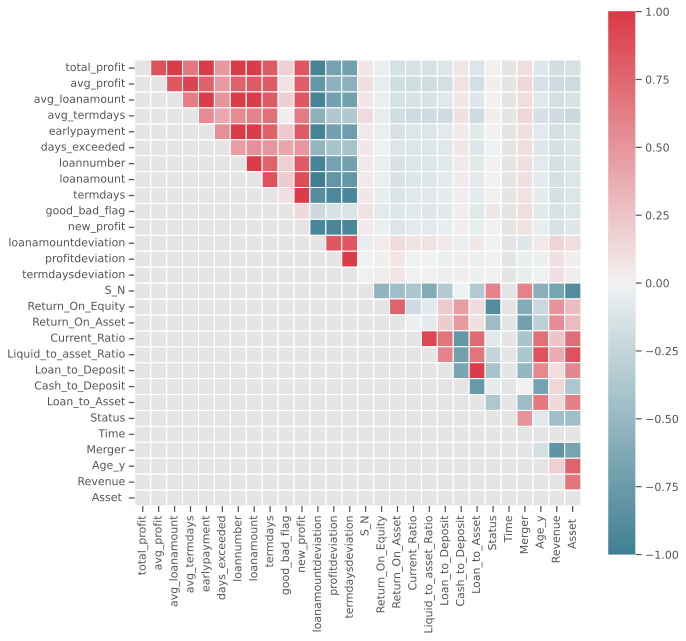

In [142]:
# Plotting correlations
dataViz = correlations
sns.set_context(context='notebook')
fig, ax = plt.subplots(figsize=(10,10)) 
corr = dataViz.corr()

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.tril_indices_from(mask)] = True

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

sns.heatmap(corr, cmap=cmap,linewidths=1, vmin=-1, vmax=1, square=True, cbar=True, center=0, ax=ax, mask=mask)

In [143]:
# calculate correlation with target variable
correlation_with_target = correlations.sort_values('good_bad_flag')['good_bad_flag']
print('Most Negative:\n')
display(correlation_with_target.head(10)) # most negative
print('\nMost Positive:\n')
display(correlation_with_target.tail(10))

Most Negative:



loanamountdeviation     -0.11
Revenue                 -0.03
Return_On_Equity        -0.02
Age_y                   -0.01
profitdeviation         -0.01
Return_On_Asset         -0.00
Asset                    0.00
termdaysdeviation        0.00
Loan_to_Asset            0.00
Liquid_to_asset_Ratio    0.00
Name: good_bad_flag, dtype: float64


Most Positive:



new_profit       0.03
avg_profit       0.05
total_profit     0.09
loannumber       0.09
avg_loanamount   0.10
loanamount       0.12
earlypayment     0.15
days_exceeded    0.24
good_bad_flag    1.00
Time              nan
Name: good_bad_flag, dtype: float64

In [144]:
# visualize distribution of correlated variables
data['good_bad_flag'] = data['good_bad_flag'].fillna(-1).astype(int)
def corr_target_plot(df, feature, title):
    """Kernel density estimate plot of a feature colored
    by value of the target."""
    
    # Need to reset index for loc to workBU
    df = df.reset_index()
    plt.figure(figsize = (10, 6))
    plt.style.use('fivethirtyeight')
    
    # plot repaid loans
    sns.kdeplot(df.loc[df['good_bad_flag'] == 0, feature], label = 'target == 0')
    # plot loans that were not repaid
    sns.kdeplot(df.loc[df['good_bad_flag'] == 1, feature], label = 'target == 1')
    
    # Label the plots
    plt.title(title)
    plt.xlabel('%s' % feature); 
    plt.ylabel('Density');
    plt.show()

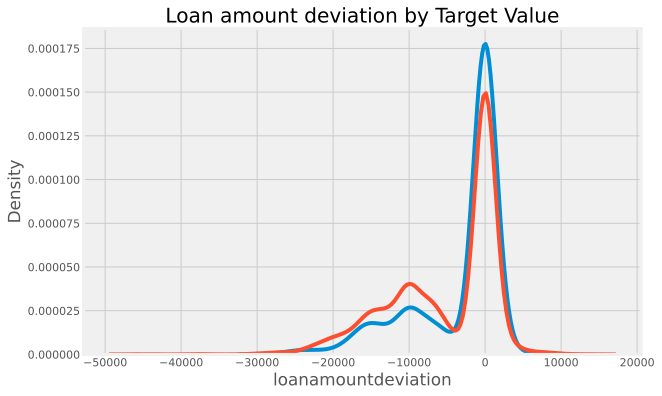

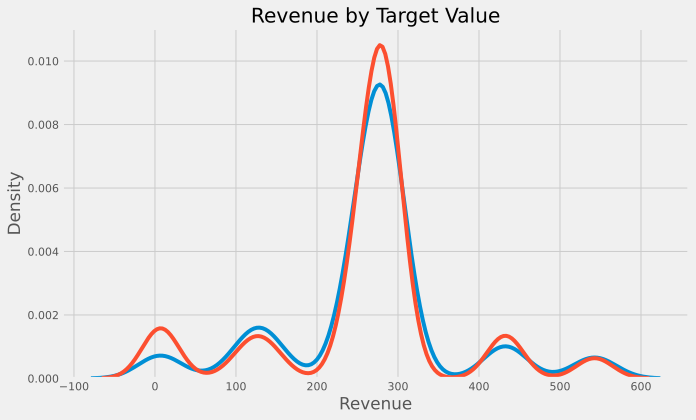

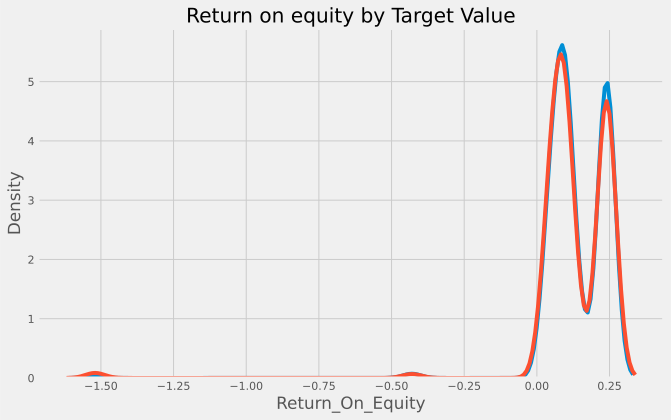

In [145]:
# least correlated
corr_target_plot(data, feature = 'loanamountdeviation', title='Loan amount deviation by Target Value')
corr_target_plot(data, feature = 'Revenue', title='Revenue by Target Value')
corr_target_plot(data, feature = 'Return_On_Equity', title='Return on equity by Target Value')

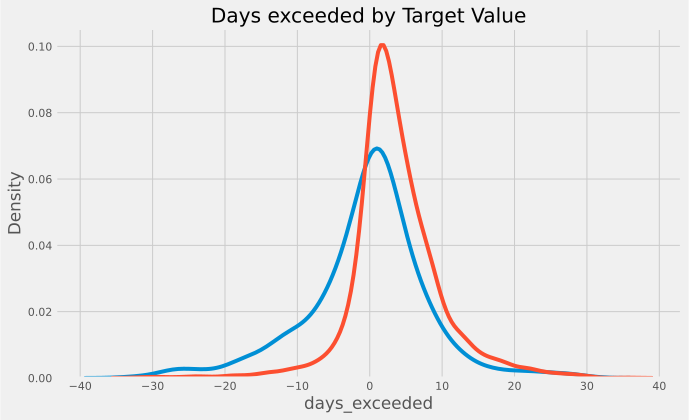

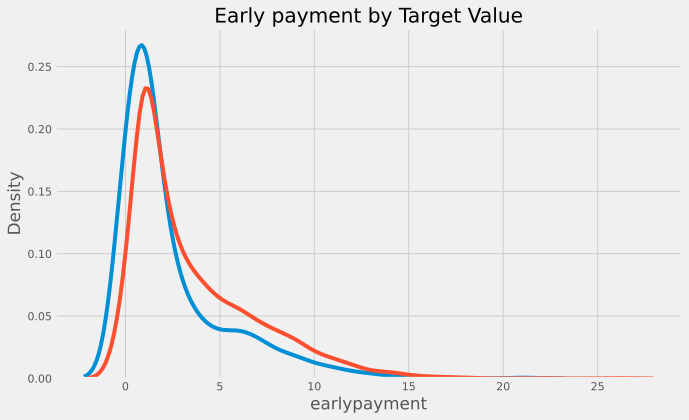

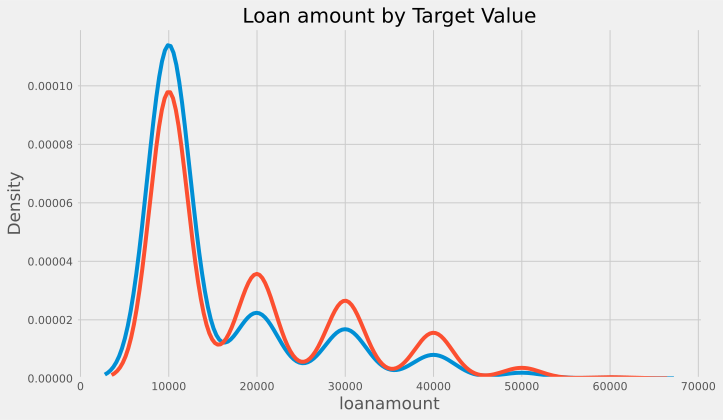

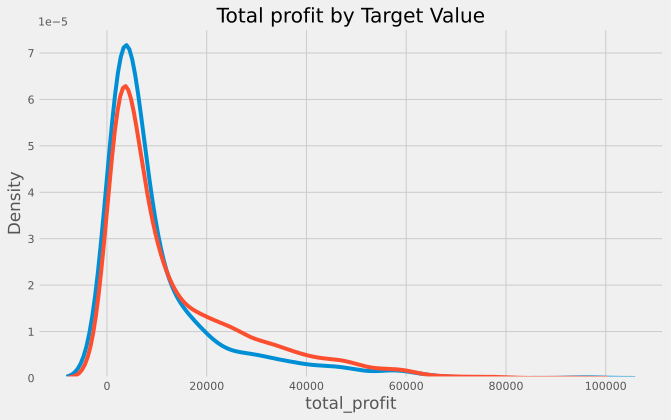

In [146]:
# high correlation
corr_target_plot(data, feature = 'days_exceeded', title='Days exceeded by Target Value')
corr_target_plot(data, feature = 'earlypayment', title='Early payment by Target Value')
corr_target_plot(data, feature='loanamount', title='Loan amount by Target Value')
corr_target_plot(data, feature = 'total_profit', title='Total profit by Target Value')

#### <b>11.2 Collinear Features</b>

Some variables have strong correlation, which should be treated. The next step in this case would be to choose a threshold for correlation allowed in the model. 

The threshold was chosen to 0.7, because pairwise correlation higher than 0.7 may lead to unstable estimates and multicollinearity. After the threshold was decided, the variable which correlates the most with the response variable was kept.


In [147]:
threshold = 0.7
correlated_pairs = {}

# Iterate through the columns
for col in correlations:
    # Find correlations above the threshold
    above_threshold_vars = [x for x in list(correlations.index[correlations[col] > threshold]) if x != col]
    correlated_pairs[col] = above_threshold_vars

In [148]:
print('Total profit -> ', correlated_pairs['total_profit'])
print('Average profit -> ', correlated_pairs['avg_profit'])
print('Average loan amount -> ', correlated_pairs['avg_loanamount'])

Total profit ->  ['avg_loanamount', 'earlypayment', 'loannumber', 'loanamount']
Average profit ->  ['avg_termdays']
Average loan amount ->  ['total_profit', 'earlypayment', 'loannumber', 'loanamount']


In [149]:
display(correlations['total_profit'].sort_values(ascending=False).head())
print('\n')
display(correlations['avg_profit'].sort_values(ascending=False).head())
print('\n')
display(correlations['avg_loanamount'].sort_values(ascending=False).head())

total_profit     1.00
loannumber       0.94
avg_loanamount   0.92
earlypayment     0.90
loanamount       0.86
Name: total_profit, dtype: float64

avg_profit       1.00
avg_termdays     0.93
total_profit     0.66
avg_loanamount   0.61
termdays         0.60
Name: avg_profit, dtype: float64

avg_loanamount   1.00
total_profit     0.92
loanamount       0.89
earlypayment     0.86
loannumber       0.85
Name: avg_loanamount, dtype: float64

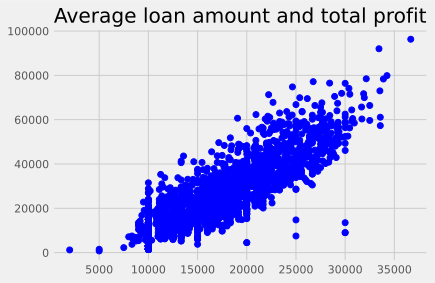

In [150]:
# display collinear features
plt.plot(data['avg_loanamount'], data['total_profit'], 'bo')
plt.title('Average loan amount and total profit');

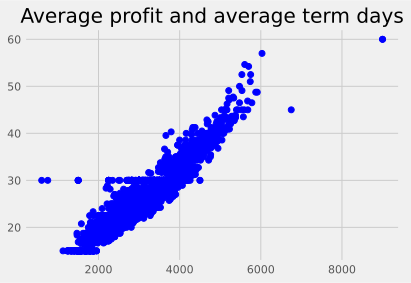

In [151]:
plt.plot(data['avg_profit'], data['avg_termdays'], 'bo')
plt.title('Average profit and average term days');

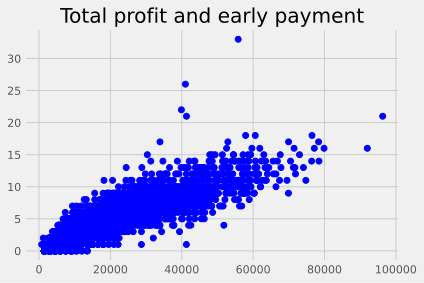

In [152]:
plt.plot(data['total_profit'], data['earlypayment'], 'bo')
plt.title('Total profit and early payment');

#### <b>11.3 Drop correlated features</b>

To avoid multicollinearity in the data, variables exhibiting high degrees of multicollinearity >0.7 were dropped from the dataset.

In [153]:
# Upper triangle of correlations
upper = correlations.where(np.triu(np.ones(correlations.shape), k=1).astype(np.bool))
display(upper.head())

total_profit  avg_profit  avg_loanamount  avg_termdays  \
total_profit             nan        0.66            0.92          0.43   
avg_profit               nan         nan            0.61          0.93   
avg_loanamount           nan         nan             nan          0.33   
avg_termdays             nan         nan             nan           nan   
earlypayment             nan         nan             nan           nan   

                earlypayment  days_exceeded  loannumber  loanamount  termdays  \
total_profit            0.90           0.18        0.94        0.86      0.53   
avg_profit              0.47           0.22        0.46        0.54      0.60   
avg_loanamount          0.86           0.21        0.85        0.89      0.48   
avg_termdays            0.23           0.19        0.22        0.29      0.53   
earlypayment             nan           0.29        0.94        0.86      0.43   

                good_bad_flag  new_profit  loanamountdeviation  \
total_profit             0.09        0.53                -0.71   
avg_profit               0.05        0.55                -0.43   
avg_loanamount           0.10        0.50                -0.70   
avg_termdays             0.02        0.41                -0.23   
earlypayment             0.15        0.48                -0.75   

                profitdeviation  termdaysdeviation   S_N  Return_On_Equity  \
total_profit              -0.24              -0.32 -0.02              0.00   
avg_profit                -0.06              -0.05 -0.01             -0.00   
avg_loanamount            -0.23              -0.33 -0.01              0.00   
avg_termdays               0.07               0.08  0.00             -0.00   
earlypayment              -0.29              -0.34 -0.02              0.00   

                Return_On_Asset  Current_Ratio  Liquid_to_asset_Ratio  \
total_profit              -0.01           0.00                   0.00   
avg_profit                -0.01           0.00                  -0.00   
avg_loanamount            -0.01           0.01                   0.01   
avg_termdays              -0.02          -0.00                  -0.00   
earlypayment              -0.01           0.01                   0.01   

                Loan_to_Deposit  Cash_to_Deposit  Loan_to_Asset  Status  Time  \
total_profit               0.02             0.02           0.01   -0.00   nan   
avg_profit                -0.00             0.02          -0.01   -0.00   nan   
avg_loanamount             0.03             0.01           0.02   -0.00   nan   
avg_termdays              -0.02             0.02          -0.02   -0.00   nan   
earlypayment               0.03             0.00           0.02   -0.00   nan   

                Merger  Age_y  Revenue  Asset   
total_profit      0.01   0.00    -0.03    0.00  
avg_profit        0.01  -0.01    -0.03   -0.02  
avg_loanamount    0.00   0.01    -0.03    0.01  
avg_termdays      0.01  -0.02    -0.03   -0.03  
earlypayment      0.00   0.01    -0.03    0.02

In [154]:
# Select columns with correlations above threshold
to_drop = [column for column in upper.columns if any(upper[column] > threshold)]
print('There are %d columns to drop:' % (len(to_drop)))
display(to_drop)

There are 10 columns to drop:


['avg_loanamount',
 'avg_termdays',
 'earlypayment',
 'loannumber',
 'loanamount',
 'new_profit',
 'termdaysdeviation',
 'Liquid_to_asset_Ratio',
 'Loan_to_Asset',
 'Asset ']

In [155]:
# columns to drop
print('\nOld shape: ', data.shape)
data = data.drop(columns = to_drop)
print('New shape: ', data.shape)


Old shape:  (5818, 33)
New shape:  (5818, 23)


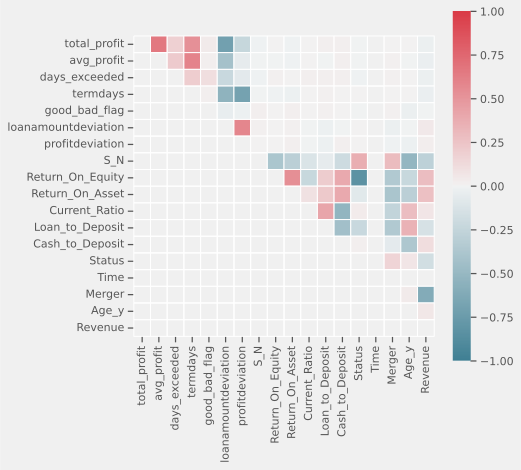

In [156]:
# plotting correlations outcome
dataViz = data
sns.set_context(context='notebook')
fig, ax = plt.subplots(figsize=(6,6)) 
corr = dataViz.corr()

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.tril_indices_from(mask)] = True

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

sns.heatmap(corr, cmap=cmap,linewidths=1, vmin=-1, vmax=1, square=True, cbar=True, center=0, ax=ax, mask=mask)

### <b>12.0 Model Build</b>

In [157]:
data_final = data.copy(deep=True)

In [158]:
# Encoding categorical variables
def dummify(col_name, df):
    df_dummies = pd.get_dummies(df[col_name], prefix=col_name).iloc[:, 1:] 
    return df_dummies

#call the function
dummy_cols = ['bank_account_type','employment_status_clients','level_of_education_clients','Age_x']
for col_name in dummy_cols:
    dummies = dummify(col_name, data_final)
    data_final = pd.concat([data_final, dummies], axis=1) # join the dummy columns to the original df
    data_final = data_final.drop([col_name], axis=1) # drop the original cat. vars column

In [159]:
# rename target variable
data_final.rename(columns={'good_bad_flag': 'TARGET'}, inplace=True)

In [160]:
# fill missing values with 0
data_final.fillna(0, inplace=True)
data_final.isnull().sum().any()

False

In [161]:
# preview data
data_final.tail(3)

customerid  total_profit  avg_profit  \
5815  8a858e9f59d692440159da2c60b42106          0.00        0.00   
5816  8a858f0d58a18ebc0158a9bf124b5a30          0.00        0.00   
5817  8a85890253e2f1180153eae33e5e6bc3          0.00        0.00   

      days_exceeded  termdays  TARGET  loanamountdeviation  profitdeviation  \
5815           0.00        30      -1                 0.00             0.00   
5816           0.00        15      -1                 0.00             0.00   
5817           0.00        30      -1                 0.00             0.00   

      S_N  Return_On_Equity  Return_On_Asset  Current_Ratio  Loan_to_Deposit  \
5815 2.00              0.10             0.01           1.04             0.49   
5816 3.00              0.09             0.03           1.12             0.64   
5817 4.00              0.24             0.04           0.99             0.71   

      Cash_to_Deposit  Status  Time  Merger  Age_y  Revenue  \
5815             0.33    0.00 10.00    1.00  66.00   247.20   
5816             0.14    0.00 10.00    0.00  25.00   432.50   
5817             0.32    0.00 10.00    0.00  25.00   280.10   

      bank_account_type_Other  bank_account_type_Savings  \
5815                        0                          1   
5816                        0                          1   
5817                        0                          1   

      employment_status_clients_Permanent  employment_status_clients_Retired  \
5815                                    1                                  0   
5816                                    1                                  0   
5817                                    1                                  0   

      employment_status_clients_Self-Employed  \
5815                                        0   
5816                                        0   
5817                                        0   

      employment_status_clients_Student  employment_status_clients_Unemployed  \
5815                                  0                                     0   
5816                                  0                                     0   
5817                                  0                                     0   

      level_of_education_clients_Post-Graduate  \
5815                                         0   
5816                                         0   
5817                                         0   

      level_of_education_clients_Primary  \
5815                                   0   
5816                                   0   
5817                                   0   

      level_of_education_clients_Secondary  Age_x_YoungAge  Age_x_MiddleAge  \
5815                                     0               0                1   
5816                                     0               1                0   
5817                                     0               0                1   

      Age_x_SeniorAge  
5815                0  
5816                0  
5817                0

In [162]:
train = data_final[(data_final['TARGET'] == 1) | (data_final['TARGET'] == 0)]
test = data_final[(data_final['TARGET'] < 0)]

In [163]:
X = train.drop(["customerid", "TARGET"], axis=1)
print("Train Set Shape: {} Rows, {} Columns".format(*X.shape))
test = test.drop(["TARGET"], axis=1)
print("Submission Set Shape: {} Rows, {} Columns".format(*test.shape))
y = train["TARGET"]

Train Set Shape: 4368 Rows, 30 Columns
Submission Set Shape: 1450 Rows, 31 Columns


In [164]:
X.head(3)

total_profit  avg_profit  days_exceeded  termdays  loanamountdeviation  \
0      1,500.00    1,500.00          -7.00        15                 0.00   
1     19,500.00    4,875.00           6.25        60           -12,500.00   
2     16,500.00    2,357.14           1.00        30            -7,142.86   

   profitdeviation  S_N  Return_On_Equity  Return_On_Asset  Current_Ratio  \
0             0.00 4.00              0.24             0.04           0.99   
1        -4,125.00 0.00              0.00             0.00           0.00   
2        -2,142.86 4.00              0.24             0.04           0.99   

   Loan_to_Deposit  Cash_to_Deposit  Status  Time  Merger  Age_y  Revenue  \
0             0.71             0.32    0.00 10.00    0.00  25.00   280.10   
1             0.00             0.00    0.00 10.00    1.00  16.00     2.10   
2             0.71             0.32    0.00 10.00    0.00  25.00   280.10   

   bank_account_type_Other  bank_account_type_Savings  \
0                        0                          1   
1                        1                          0   
2                        0                          1   

   employment_status_clients_Permanent  employment_status_clients_Retired  \
0                                    1                                  0   
1                                    1                                  0   
2                                    1                                  0   

   employment_status_clients_Self-Employed  employment_status_clients_Student  \
0                                        0                                  0   
1                                        0                                  0   
2                                        0                                  0   

   employment_status_clients_Unemployed  \
0                                     0   
1                                     0   
2                                     0   

   level_of_education_clients_Post-Graduate  \
0                                         0   
1                                         0   
2                                         0   

   level_of_education_clients_Primary  level_of_education_clients_Secondary  \
0                                   1                                     0   
1                                   0                                     0   
2                                   0                                     0   

   Age_x_YoungAge  Age_x_MiddleAge  Age_x_SeniorAge  
0               0                1                0  
1               0                1                0  
2               0                1                0

In [165]:
y.value_counts()

1    3416
0     952
Name: TARGET, dtype: int64

In [166]:
# Split training data into training and testing set
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=.3, random_state=42)

**Dummy Classifier**

The dummy classifier gives you a measure of "baseline" performance--i.e. the success rate one should expect to achieve.

In [167]:
clf_dummy = DummyClassifier(strategy="most_frequent")
X_train, X_test, y_train, y_test = train_test_split(X, y)
clf_dummy.fit(X_train, y_train)
clf_dummy.score(X_test, y_test)

0.793040293040293

**Function to measure the model**

In [168]:
#Model function
def model(algorithm,dtrain_X,dtrain_Y,dtest_X,dtest_Y,cols=None):

    algorithm.fit(dtrain_X[cols],dtrain_Y)
    predictions = algorithm.predict(dtest_X[cols])

    cm1 = confusion_matrix(predictions, dtest_Y)
    print ("Accuracy score : ", accuracy_score(predictions,dtest_Y))
    print ("Recall score   : ", recall_score(predictions,dtest_Y))
    print ("Precision score : ", precision_score(predictions,dtest_Y))
    print ("Sensitivity score : ", cm1[0,0]/(cm1[0,0] + cm1[0,1]))
    print ("F-score : ", f1_score(predictions,dtest_Y))

#### <b>12.1 Logistic Regression

In [169]:
# Logistic Regression
logit = LogisticRegression()
model(logit,X_train,y_train,X_test,y_test,X_train.columns)

Accuracy score :  0.7939560439560439
Recall score   :  0.8020735155513666
Precision score :  0.9826789838337182
Sensitivity score :  0.5161290322580645
F-score :  0.8832381940840685


#### <b>12.2 Decision Tree Classifier

In [170]:
# Decision Tree
dtc = DecisionTreeClassifier()
model(dtc,X_train,y_train,X_test,y_test,X_train.columns)

Accuracy score :  0.6895604395604396
Recall score   :  0.8170878459687124
Precision score :  0.7840646651270208
Sensitivity score :  0.2835249042145594
F-score :  0.8002357100766059


#### <b> 12.3 Random Forest Classifier</b>

In [171]:
# Using random forest and hyper parameters tuning
rfc = RandomForestClassifier()
model(rfc,X_train,y_train,X_test,y_test,X_train.columns)

Accuracy score :  0.7454212454212454
Recall score   :  0.8094736842105263
Precision score :  0.8879907621247113
Sensitivity score :  0.31690140845070425
F-score :  0.8469162995594713


#### <b>12.4 Gaussian Naive Bayes

In [172]:
# Gaussian Naive Bayes
gnb = GaussianNB()
model(gnb,X_train,y_train,X_test,y_test,X_train.columns)

Accuracy score :  0.7307692307692307
Recall score   :  0.8372641509433962
Precision score :  0.8198614318706697
Sensitivity score :  0.36065573770491804
F-score :  0.8284714119019836


#### <b>12.5 XGBoost Classifier

In [173]:
# XGBoost Classifier
xgb = XGBClassifier()
model(xgb,X_train,y_train,X_test,y_test,X_train.columns)

Accuracy score :  0.793040293040293
Recall score   :  0.8131115459882583
Precision score :  0.9595842956120092
Sensitivity score :  0.5
F-score :  0.8802966101694916


#### <b>12.6 Gradient Boosting Classifier

In [174]:
# Gradient Boosting Classifier
gbc = GradientBoostingClassifier()
model(gbc,X_train,y_train,X_test,y_test,X_train.columns)

Accuracy score :  0.7866300366300366
Recall score   :  0.8118226600985222
Precision score :  0.9515011547344111
Sensitivity score :  0.45454545454545453
F-score :  0.8761297182349814


#### **12.8 Exploring Other Models**

* KNeighbors Classifier
* Bagging Classifier
* AdaBoost Classifier
* Multilayer Perceptron

**KNeighbors Classifier**

In [175]:
knn = KNeighborsClassifier()
model(knn,X_train,y_train,X_test,y_test,X_train.columns)

Accuracy score :  0.7655677655677655
Recall score   :  0.8031809145129225
Precision score :  0.9330254041570438
Sensitivity score :  0.32558139534883723
F-score :  0.8632478632478632


**Bagging Classifier**

In [176]:
bgc = BaggingClassifier()
model(bgc,X_train,y_train,X_test,y_test,X_train.columns)

Accuracy score :  0.7353479853479854
Recall score   :  0.8201997780244173
Precision score :  0.8533487297921478
Sensitivity score :  0.33507853403141363
F-score :  0.8364459535936617


**AdaBoost Classifier**

In [177]:
ada = AdaBoostClassifier()
model(ada,X_train,y_train,X_test,y_test,X_train.columns)

Accuracy score :  0.7802197802197802
Recall score   :  0.810515873015873
Precision score :  0.9434180138568129
Sensitivity score :  0.4166666666666667
F-score :  0.871931696905016


**Multilayer Perceptron**

A multilayer perceptron (MLP) is a feedforward artificial neural network. An MLP consists of at least three layers of nodes. MLP utilizes a supervised learning technique called backpropagation for training.Its multiple layers and non-linear activation distinguish MLP from a linear perceptron. It can distinguish data that is not linearly separable.

In [178]:
mlp = MLPClassifier()
model(mlp,X_train,y_train,X_test,y_test,X_train.columns)

Accuracy score :  0.7921245421245421
Recall score   :  0.7933884297520661
Precision score :  0.9976905311778291
Sensitivity score :  0.3333333333333333
F-score :  0.8838874680306905


### <b>13.0 Model Results</b>

#### <b>13.1 Summary Report</b>

**Precision,recall,F1score for all models**

In [179]:
def summary(algorithm):
  algorithm.fit(X_train,y_train)
  algorithm_predict = algorithm.predict_proba(X_test)[:,1]
  predict_algorithm = algorithm.predict(X_test)
  predictproba_algorithm = algorithm.predict_proba(X_test)[:, 1]
  return predict_algorithm

print("LR ",classification_report(y_test, summary(logit), target_names=None))
print("DTC",classification_report(y_test, summary(dtc), target_names=None))
print("RFC",classification_report(y_test, summary(rfc), target_names=None))
print("GNB",classification_report(y_test, summary(gnb), target_names=None))
print("XGB",classification_report(y_test, summary(xgb), target_names=None))
print("GBC",classification_report(y_test, summary(gbc), target_names=None))
print("KNN",classification_report(y_test, summary(knn), target_names=None))
print("BGC",classification_report(y_test, summary(bgc), target_names=None))
print("ADA",classification_report(y_test, summary(ada), target_names=None))
print("MLP",classification_report(y_test, summary(mlp), target_names=None))

LR                precision    recall  f1-score   support

           0       0.52      0.07      0.12       226
           1       0.80      0.98      0.88       866

    accuracy                           0.79      1092
   macro avg       0.66      0.53      0.50      1092
weighted avg       0.74      0.79      0.73      1092

DTC               precision    recall  f1-score   support

           0       0.27      0.31      0.29       226
           1       0.81      0.78      0.80       866

    accuracy                           0.68      1092
   macro avg       0.54      0.55      0.54      1092
weighted avg       0.70      0.68      0.69      1092

RFC               precision    recall  f1-score   support

           0       0.33      0.19      0.24       226
           1       0.81      0.90      0.85       866

    accuracy                           0.75      1092
   macro avg       0.57      0.54      0.55      1092
weighted avg       0.71      0.75      0.73      1092

GNB    

**Checking F-Score**

In this project, F-score was chosen to be the main indicator of how well the model performed. 

In terms of business sense, the aim is to achieve a trade-off between losing money on non-performing customers and opportunity cost 
caused by declining of a potentially performing customer.
 
Thus, there is a high relevance to analyze how sensitivity and precision are affected by various methods applied, as sensitivity is a 
measure of how many defaulted customers are captured by the model, while precision relates to the potential opportunity cost. 

Since sensitivity and precision are of equal importance in this project, a trade-off between these metrics is considered. 

The F-score is the weighted harmonic average of precision and sensitivity

In [180]:
def f1(algorithm):
  return f1_score(y_test, summary(algorithm))

def prec(algorithm):
  return precision_score(summary(algorithm),y_test)

def sens(algorithm):
  cm = confusion_matrix(summary(algorithm),y_test)
  return cm[0,0]/(cm[0,0] + cm[0,1])

def roc(algorithm):
  return roc_auc_score(summary(algorithm), y_test)

def acc(algorithm):
  return accuracy_score(summary(algorithm),y_test)

scores = {'precision':[prec(logit), prec(dtc), prec(rfc), prec(gnb), prec(xgb), prec(gbc), prec(knn), prec(bgc), prec(ada), prec(mlp)],
          'sensitivity':[sens(logit), sens(dtc), sens(rfc), sens(gnb), sens(xgb), sens(gbc), sens(knn), sens(bgc), sens(ada), sens(mlp)],
          'f1-score':[f1(logit), f1(dtc), f1(rfc), f1(gnb), f1(xgb), f1(gbc), f1(knn), f1(bgc), f1(ada), f1(mlp)],
          'roc-score': [roc(logit), roc(dtc), roc(rfc), roc(gnb), roc(xgb), roc(gbc), roc(knn), roc(bgc), roc(ada), roc(mlp)],
          'accuracy':[acc(logit), acc(dtc), acc(rfc), acc(gnb), acc(xgb), acc(gbc), acc(knn), acc(bgc), acc(ada), acc(mlp)]
          }

scores = pd.DataFrame(scores, index=['LR','DTC','RFC','GNB','XGB','GBC','KNN','BGC','ADA','MLP',])

In [181]:
# summary 
pd.options.display.float_format = "{:,.3f}".format
scores

precision  sensitivity  f1-score  roc-score  accuracy
LR       0.983        0.516     0.883      0.659     0.794
DTC      0.778        0.301     0.796      0.549     0.684
RFC      0.900        0.299     0.846      0.556     0.748
GNB      0.820        0.361     0.828      0.599     0.731
XGB      0.960        0.500     0.880      0.657     0.793
GBC      0.952        0.455     0.876      0.633     0.787
KNN      0.933        0.326     0.863      0.564     0.766
BGC      0.873        0.330     0.845      0.596     0.739
ADA      0.943        0.417     0.872      0.614     0.780
MLP      0.949        0.375     0.854      0.556     0.651

In [182]:
# best precision score
scores['precision'].sort_values(ascending=False).head(1)

LR   0.983
Name: precision, dtype: float64

In [183]:
# best sensitivity score
scores['sensitivity'].sort_values(ascending=False).head(1)

LR   0.516
Name: sensitivity, dtype: float64

In [184]:
# best roc-score
scores['roc-score'].sort_values(ascending=False).head(1)

LR   0.659
Name: roc-score, dtype: float64

In [185]:
# best accuracy score
scores['accuracy'].sort_values(ascending=False).head(1)

LR   0.794
Name: accuracy, dtype: float64

In [186]:
# top five models
scores['f1-score'].sort_values(ascending=False).head(5)

LR    0.883
XGB   0.880
GBC   0.876
ADA   0.872
KNN   0.863
Name: f1-score, dtype: float64

### **14.0 Impact of Recursive Feature Elimination (RFE)**

#### <b>14.1 Feature Selection</b>

First, select the features with high correlation with the target variable. The Wrapper method is adopted here. The 30 features with the strongest correlation with the target variable are screened by the violent Recursive Feature Elimination method, and the features are gradually eliminated to achieve the first dimensionality reduction. The independent variable is reduced from 30 to:

* 7, 
* 18, and 
* 25 respectively.

In [187]:
from sklearn.feature_selection import RFE
# Create a recursive feature elimination filter
# XGBoost - Best model
xgb = XGBClassifier()
xgb_rfe1 = RFE(xgb, n_features_to_select=7, step=1) #Select features through recursion, select 10 features
xgb_rfe1 = xgb_rfe1.fit(X_train, y_train)
# Print filter results
print(xgb_rfe1.n_features_)
print(xgb_rfe1.estimator_ )
print(xgb_rfe1.support_)
print(xgb_rfe1.ranking_) #ranking 1 means selected, others are not selected 

7
XGBClassifier()
[False False  True False False  True False False False False False False
 False False False False False  True  True False False  True False False
 False False  True  True False False]
[10  9  1 17 13  1  4  8  6  5 11  3 20 22 16  7  2  1  1 19 21  1 15 12
 23 24  1  1 18 14]


In [188]:
xgb_rfe2 = RFE(xgb, n_features_to_select=18, step=1) #Select features through recursion, select 10 features
xgb_rfe2 = xgb_rfe2.fit(X_train, y_train)
# Print filter results
print(xgb_rfe2.n_features_)
print(xgb_rfe2.estimator_ )
print(xgb_rfe2.support_)
print(xgb_rfe2.ranking_) #ranking 1 means selected, others are not selected

18
XGBClassifier()
[ True  True  True False False  True  True  True  True  True  True  True
 False False False  True  True  True  True False False  True False  True
 False False  True  True False False]
[ 1  1  1  6  2  1  1  1  1  1  1  1  9 11  5  1  1  1  1  8 10  1  4  1
 12 13  1  1  7  3]


In [189]:
xgb_rfe3 = RFE(xgb, n_features_to_select=25, step=1) #Select features through recursion, select 10 features
xgb_rfe3 = xgb_rfe3.fit(X_train, y_train)
# Print filter results
print(xgb_rfe3.n_features_)
print(xgb_rfe3.estimator_ )
print(xgb_rfe3.support_)
print(xgb_rfe3.ranking_) #ranking 1 means selected, others are not selected

25
XGBClassifier()
[ True  True  True  True  True  True  True  True  True  True  True  True
 False False  True  True  True  True  True  True False  True  True  True
 False False  True  True  True  True]
[1 1 1 1 1 1 1 1 1 1 1 1 2 4 1 1 1 1 1 1 3 1 1 1 5 6 1 1 1 1]


In [190]:
col_filter1 = X_train.columns[xgb_rfe1.support_] #Filter variables after the first dimensionality reduction by Boolean value
col_filter2 = X_train.columns[xgb_rfe2.support_] 
col_filter3 = X_train.columns[xgb_rfe3.support_] 

#### <b>14.2 Visualizing Feature Importances </b>

The Pearson correlation map can be used to visualize feature importances.

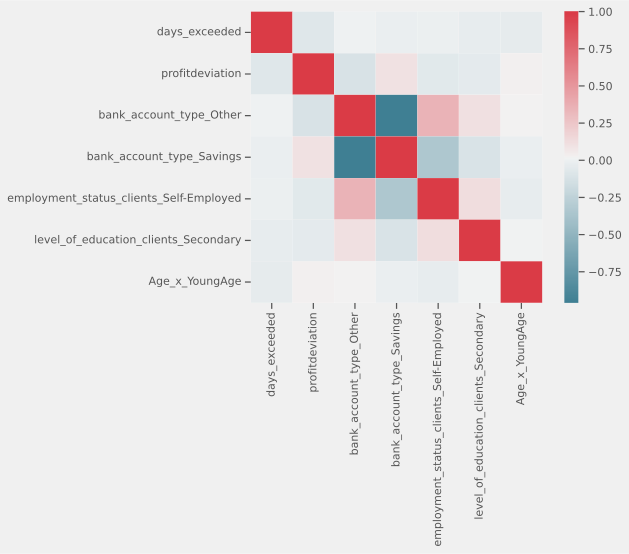

In [191]:
plt.figure(figsize=(7,5))
# plt.title('Pearson Correlation of Features', y=1.05, size=15)
cmap = sns.diverging_palette(220, 10, as_cmap=True)
sns.heatmap(data_final[col_filter1].corr(),linewidths=0.1,vmax=1.0, square=True, cmap=cmap, linecolor='white', annot=False)

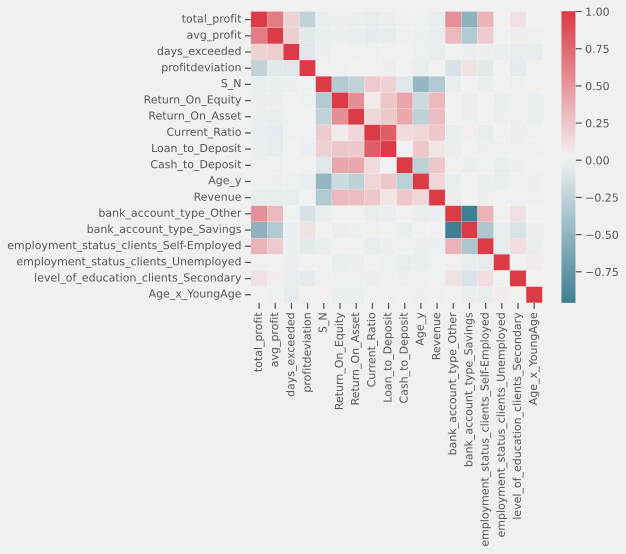

In [192]:
plt.figure(figsize=(6,5))
# plt.title('Pearson Correlation of Features', y=1.05, size=15)
cmap = sns.diverging_palette(220, 10, as_cmap=True)
sns.heatmap(data_final[col_filter2].corr(),linewidths=0.1,vmax=1.0, square=True, cmap=cmap, linecolor='white', annot=False)

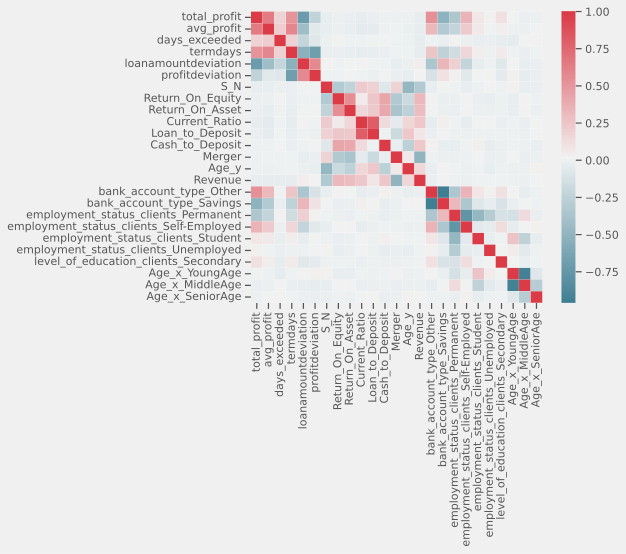

In [193]:
plt.figure(figsize=(6,5))
# plt.title('Pearson Correlation of Features', y=1.05, size=15)
cmap = sns.diverging_palette(220, 10, as_cmap=True)
sns.heatmap(data_final[col_filter3].corr(),linewidths=0.1,vmax=1.0, square=True, cmap=cmap, linecolor='white', annot=False)

**Feature weights**

We need to have a correct evaluation and ranking of the feature weights. 

You can use feature importance ranking to determine which variables are more important, reduce the difficulty of learning, and finally achieve the purpose of optimizing the model calculation. 

Here, we use the random forest algorithm to determine the importance of features, and the engineering implementation method uses the scikit-learn featureimportances method.

In [194]:
names1 = X_train[col_filter1].columns
clf1=RandomForestClassifier(n_estimators=10,random_state=123) #Build a classification random forest classifier
clf1.fit(X_train[col_filter1], y_train) #fit independent and dependent variables
for feature in zip(names1, clf1.feature_importances_):
  print(feature)

('days_exceeded', 0.6218401448638194)
('profitdeviation', 0.31668656985611515)
('bank_account_type_Other', 0.01432765137820028)
('bank_account_type_Savings', 0.014642592389758848)
('employment_status_clients_Self-Employed', 0.011526454989666032)
('level_of_education_clients_Secondary', 0.006472979023338963)
('Age_x_YoungAge', 0.014503607499101383)


In [195]:
names2 = X_train[col_filter2].columns
clf2=RandomForestClassifier(n_estimators=10,random_state=123) #Build a classification random forest classifier
clf2.fit(X_train[col_filter2], y_train) #fit independent and dependent variables
for feature in zip(names2, clf2.feature_importances_):
  print(feature)

('total_profit', 0.14908360349434097)
('avg_profit', 0.11172151304702471)
('days_exceeded', 0.4044196224992276)
('profitdeviation', 0.1260206072998397)
('S_N', 0.014587214831643644)
('Return_On_Equity', 0.013660680134814094)
('Return_On_Asset', 0.012658870566017864)
('Current_Ratio', 0.019014779833466597)
('Loan_to_Deposit', 0.0135943061098509)
('Cash_to_Deposit', 0.014261873762267438)
('Age_y', 0.012109135142491609)
('Revenue', 0.022731633836757515)
('bank_account_type_Other', 0.013261105916184441)
('bank_account_type_Savings', 0.012930229516509044)
('employment_status_clients_Self-Employed', 0.011347666694113299)
('employment_status_clients_Unemployed', 0.006665883128160283)
('level_of_education_clients_Secondary', 0.0063515509951392185)
('Age_x_YoungAge', 0.035579723192151205)


In [196]:
names3 = X_train[col_filter3].columns
clf3=RandomForestClassifier(n_estimators=10,random_state=123) #Build a classification random forest classifier
clf3.fit(X_train[col_filter3], y_train) #fit independent and dependent variables
for feature in zip(names3, clf3.feature_importances_):
  print(feature)

('total_profit', 0.1248747277043794)
('avg_profit', 0.07676075042015079)
('days_exceeded', 0.38470258616446035)
('termdays', 0.023385055301251897)
('loanamountdeviation', 0.05963291017666162)
('profitdeviation', 0.09336014051930468)
('S_N', 0.013243100517893729)
('Return_On_Equity', 0.012547421461762838)
('Return_On_Asset', 0.015221406883579118)
('Current_Ratio', 0.01802135120938001)
('Loan_to_Deposit', 0.01586412537867318)
('Cash_to_Deposit', 0.012574494079615124)
('Merger', 0.006062180054627545)
('Age_y', 0.011237366968433754)
('Revenue', 0.020958285551034607)
('bank_account_type_Other', 0.012454151335300341)
('bank_account_type_Savings', 0.016322481842342484)
('employment_status_clients_Permanent', 0.011331939117785217)
('employment_status_clients_Self-Employed', 0.006349568459404707)
('employment_status_clients_Student', 0.008197846152466938)
('employment_status_clients_Unemployed', 0.005473200140942268)
('level_of_education_clients_Secondary', 0.0052872854378734555)
('Age_x_YoungA

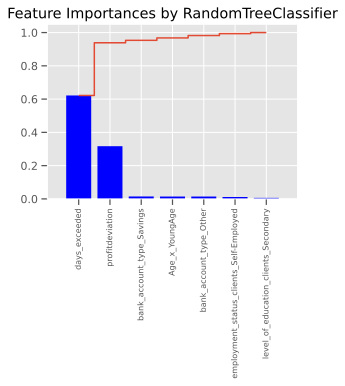

In [197]:
# feature importances Visualization
plt.style.use('ggplot')
importances1 = clf1.feature_importances_
feat_names1 = names1
indices1 = np.argsort(importances1)[::-1]
fig = plt.figure(figsize=(4,3))
plt.title("Feature Importances by RandomTreeClassifier")
plt.bar(range(len(indices1)), importances1[indices1], color='blue',  align="center")
plt.step(range(len(indices1)), np.cumsum(importances1[indices1]), where='mid', label='Cumulative')
plt.xticks(range(len(indices1)), feat_names1[indices1], rotation='vertical',fontsize=8)
plt.xlim([-1, len(indices1)])
plt.show()

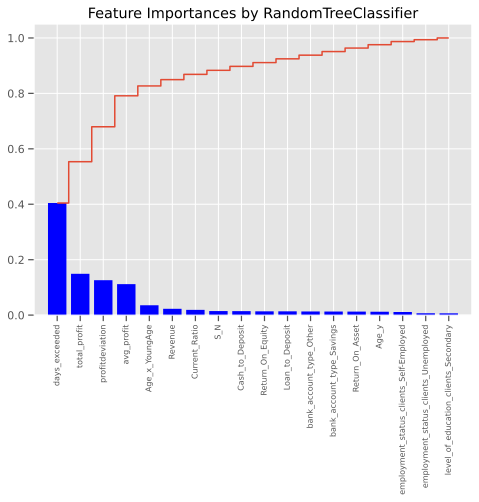

In [198]:
# feature importances Visualization
plt.style.use('ggplot')
importances2 = clf2.feature_importances_
feat_names2 = names2
indices2 = np.argsort(importances2)[::-1]
fig = plt.figure(figsize=(7,5))
plt.title("Feature Importances by RandomTreeClassifier")
plt.bar(range(len(indices2)), importances2[indices2], color='blue',  align="center")
plt.step(range(len(indices2)), np.cumsum(importances2[indices2]), where='mid', label='Cumulative')
plt.xticks(range(len(indices2)), feat_names2[indices2], rotation='vertical',fontsize=8)
plt.xlim([-1, len(indices2)])
plt.show()

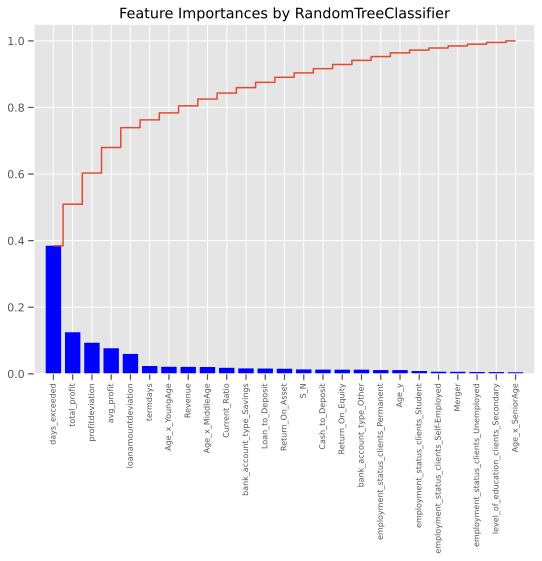

In [199]:
# feature importances Visualization
plt.style.use('ggplot')
importances3 = clf3.feature_importances_
feat_names3 = names3
indices3 = np.argsort(importances3)[::-1]
fig = plt.figure(figsize=(8,6))
plt.title("Feature Importances by RandomTreeClassifier")
plt.bar(range(len(indices3)), importances3[indices3], color='blue',  align="center")
plt.step(range(len(indices3)), np.cumsum(importances3[indices3]), where='mid', label='Cumulative')
plt.xticks(range(len(indices3)), feat_names3[indices3], rotation='vertical',fontsize=8)
plt.xlim([-1, len(indices3)])
plt.show()

#### **14.3 Handling sample imbalance**

The number of target variables is quite different, which will cause trouble for model learning. We use the oversampling method to deal with the sample imbalance problem, the specific operation uses SMOTE (Synthetic Minority Oversampling Technique).

The basic principle of SMOTE is: Sampling the nearest neighbor algorithm, calculating the K nearest neighbors of each minority sample, randomly selecting N samples from the K nearest neighbors for random linear interpolation, constructing a new minority sample, and combining the new sample with the original data which is synthesized to generate a new training set.

In [200]:
# Build independent and dependent variables
rfe_train = data_final[(data_final['TARGET'] == 1) | (data_final['TARGET'] == 0)]
rfe_test = data_final[(data_final['TARGET'] < 0)]

# train
X1 = rfe_train[col_filter1]
print("Batch 1 Train Set Shape: {} Rows, {} Columns".format(*X1.shape))

X2 = rfe_train[col_filter2]
print("Batch 2 Train Set Shape: {} Rows, {} Columns".format(*X2.shape))

X3 = rfe_train[col_filter3]
print("Batch 3 Train Set Shape: {} Rows, {} Columns".format(*X3.shape))

# target
rfe_test = rfe_test.drop(["TARGET"], axis=1)
print("\nSubmission Set Shape: {} Rows, {} Columns".format(*test.shape))
y1 = rfe_train["TARGET"]
y2 = rfe_train["TARGET"]
y3 = rfe_train["TARGET"]
 
print('\nBatch 1 Independent Variables:', X1.shape[1])
print('Batch 2 Independent Variables:', X2.shape[1])
print('Batch 3 Independent Variables:', X3.shape[1])

Batch 1 Train Set Shape: 4368 Rows, 7 Columns
Batch 2 Train Set Shape: 4368 Rows, 18 Columns
Batch 3 Train Set Shape: 4368 Rows, 25 Columns

Submission Set Shape: 1450 Rows, 31 Columns

Batch 1 Independent Variables: 7
Batch 2 Independent Variables: 18
Batch 3 Independent Variables: 25


In [201]:
# Handle unbalanced data
from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state=42) # Method to deal with oversampling
X1, y1 = sm.fit_resample(X1, y1)
X2, y2 = sm.fit_resample(X2, y2)
X3, y3 = sm.fit_resample(X3, y3)
print('After balancing positive and negative samples by SMOTE method:')
n_sample1 = y1.shape[0]
n_pos_sample1 = y1[y1 == 0].shape[0]
n_neg_sample1 = y1[y1 == 1].shape[0]

n_sample2 = y2.shape[0]
n_pos_sample2 = y2[y2 == 0].shape[0]
n_neg_sample2 = y2[y2 == 1].shape[0]

n_sample3 = y3.shape[0]
n_pos_sample3 = y3[y3 == 0].shape[0]
n_neg_sample3 = y3[y3 == 1].shape[0]
print('\nBatch 1 Number of samples: {}; \nPositive samples account for {:.2%}; negative samples account for {:.2%}'.format(n_sample1,
                                                   n_pos_sample1 / n_sample1,
                                                   n_neg_sample1 / n_sample1))
print('\nBatch 2 Number of samples: {}; \nPositive samples account for {:.2%}; negative samples account for {:.2%}'.format(n_sample2,
                                                   n_pos_sample2 / n_sample2,
                                                   n_neg_sample2 / n_sample2))
print('\nBatch 3 Number of samples: {}; \nPositive samples account for {:.2%}; negative samples account for {:.2%}'.format(n_neg_sample3,
                                                   n_pos_sample3 / n_sample3,
                                                   n_neg_sample3 / n_sample3))

After balancing positive and negative samples by SMOTE method:

Batch 1 Number of samples: 6832; 
Positive samples account for 50.00%; negative samples account for 50.00%

Batch 2 Number of samples: 6832; 
Positive samples account for 50.00%; negative samples account for 50.00%

Batch 3 Number of samples: 3416; 
Positive samples account for 50.00%; negative samples account for 50.00%


#### **14.4 Build classifier training**

We use the cross-validation method to divide the data set, and divide the data into 3 parts: training set (training set), validation set (validation set) and test set (test set). Let the model learn in the training set, perform parameter tuning on the validation set, and finally use the test set data to evaluate the performance of the model.

**Model tuning**

We use grid search tuning parameters (grid search), by constructing a set of parameter candidates, and then grid search will exhaust various parameter combinations and find the best set of settings according to the rating mechanism of the setting evaluation.

In [202]:
from sklearn.model_selection import GridSearchCV
from sklearn import linear_model
def cross_validation_best_parameters(model, param_grid,X, y):
    grid = GridSearchCV(model, param_grid,cv=10, scoring='accuracy')
    grid.fit(X,y)
    mean_scores = grid.cv_results_['mean_test_score']
    return mean_scores,grid.best_score_,grid.best_estimator_
xgb = XGBClassifier()
c=[0.001, 0.01, 0.1, 1, 10, 100, 1000]
param_grid = dict(C=c)
mean_scores1,Best_Accuracy1, Best_classifier1 = cross_validation_best_parameters(xgb,param_grid, X1, y1)
mean_scores2,Best_Accuracy2, Best_classifier2 = cross_validation_best_parameters(xgb,param_grid, X2, y2)
mean_scores3,Best_Accuracy3, Best_classifier3 = cross_validation_best_parameters(xgb,param_grid, X3, y3)
print("Batch 1 Best accuracy is "+ str(Best_Accuracy1))
print("Batch 2 Best accuracy is "+ str(Best_Accuracy2))
print("Batch 3 Best accuracy is "+ str(Best_Accuracy3))

Batch 1 Best accuracy is 0.6949750841231924
Batch 2 Best accuracy is 0.7595470190850478
Batch 3 Best accuracy is 0.790295865334395


In [203]:
X_train1, X_test1, y_train1, y_test1 = train_test_split(X1, y1, test_size = 0.3, random_state = 0) # random_state = 0 - The data for each split is the same
X_train2, X_test2, y_train2, y_test2 = train_test_split(X2, y2, test_size = 0.3, random_state = 0)
X_train3, X_test3, y_train3, y_test3 = train_test_split(X3, y3, test_size = 0.3, random_state = 0)
# Build parameter combination
param_grid = {'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000],
                            'penalty': [ 'l1', 'l2']}
# Inverse of regularization strength; must be a positive float. 
# Like in support vector machines, smaller values specify stronger regularization.
grid_search1 = GridSearchCV(xgb, param_grid, cv=10) # Determine the model LogisticRegression, and parameter combination param_grid, cv specifies 10% off
grid_search2 = GridSearchCV(xgb, param_grid, cv=10)
grid_search3 = GridSearchCV(xgb, param_grid, cv=10)
grid_search1.fit(X_train1, y_train1) # Use training set learning algorithm
grid_search2.fit(X_train2, y_train2) 
grid_search3.fit(X_train3, y_train3)

GridSearchCV(cv=10, estimator=XGBClassifier(),
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000],
                         'penalty': ['l1', 'l2']})

In [204]:
print("Batch 1:\nBest parameters: {}".format(grid_search1.best_params_))
print("Best cross-validation score: {:.5f}".format(grid_search1.best_score_))
print("\nBatch 2:\nBest parameters: {}".format(grid_search2.best_params_))
print("Best cross-validation score: {:.5f}".format(grid_search2.best_score_))
print("\nBatch 3:\nBest parameters: {}".format(grid_search3.best_params_))
print("Best cross-validation score: {:.5f}".format(grid_search3.best_score_))

Batch 1:
Best parameters: {'C': 0.001, 'penalty': 'l1'}
Best cross-validation score: 0.68843

Batch 2:
Best parameters: {'C': 0.001, 'penalty': 'l1'}
Best cross-validation score: 0.75618

Batch 3:
Best parameters: {'C': 0.001, 'penalty': 'l1'}
Best cross-validation score: 0.79215


In [205]:
print("Batch 1 Best estimator:\n{}".format(grid_search1.best_estimator_)) # grid_search.best_estimator_ returns the model and all its parameters (including optimal parameters)
print("Batch 2 Best estimator:\n{}".format(grid_search2.best_estimator_))
print("Batch 3 Best estimator:\n{}".format(grid_search3.best_estimator_))

Batch 1 Best estimator:
XGBClassifier(C=0.001, penalty='l1')
Batch 2 Best estimator:
XGBClassifier(C=0.001, penalty='l1')
Batch 3 Best estimator:
XGBClassifier(C=0.001, penalty='l1')


We now use the trained and tuned model to test on the test set.

In [206]:
# precision, sensitivity, f-score, roc-score, accuracy
y_pred1 = grid_search1.predict(X_test1)
y_pred2 = grid_search2.predict(X_test2)
y_pred3 = grid_search3.predict(X_test3)
# def sens(algorithm):
#   cm = confusion_matrix(summary(algorithm),y_test)
#   return cm[0,0]/(cm[0,0] + cm[0,1])
cm1 = confusion_matrix(y_test1, y_pred1)
cm2 = confusion_matrix(y_test2, y_pred2)
cm3 = confusion_matrix(y_test3, y_pred3)
print("Batch 1:\nprecision score: {:.5f}".format(precision_score(y_test1, y_pred1)))
print("sensitivity score: {:.5f}".format(cm1[0,0]/(cm1[0,0] + cm1[0,1])))
print("f-score: {:.5f}".format(f1_score(y_test1, y_pred1,)))
print("area under the ROC curve: {:.5f}".format(roc_auc_score(y_test1, y_pred1,)))
print("accuracy score: {:.5f}".format(accuracy_score(y_test1, y_pred1,)))

print("\nBatch 2:\nprecision score: {:.5f}".format(precision_score(y_test2, y_pred2)))
print("sensitivity score: {:.5f}".format(cm2[0,0]/(cm2[0,0] + cm2[0,1])))
print("f-score: {:.5f}".format(f1_score(y_test2, y_pred2,)))
print("area under the ROC curve: {:.5f}".format(roc_auc_score(y_test2, y_pred2,)))
print("accuracy score: {:.5f}".format(accuracy_score(y_test2, y_pred2,)))

print("\nBatch 3:\nprecision score: {:.5f}".format(precision_score(y_test3, y_pred3)))
print("sensitivity score: {:.5f}".format(cm3[0,0]/(cm3[0,0] + cm3[0,1])))
print("f-score: {:.5f}".format(f1_score(y_test3, y_pred3,)))
print("area under the ROC curve: {:.5f}".format(roc_auc_score(y_test3, y_pred3,)))
print("accuracy score: {:.5f}".format(accuracy_score(y_test3, y_pred3,)))

Batch 1:
precision score: 0.66558
sensitivity score: 0.60840
f-score: 0.73217
area under the ROC curve: 0.71098
accuracy score: 0.70878

Batch 2:
precision score: 0.71538
sensitivity score: 0.68004
f-score: 0.77248
area under the ROC curve: 0.75976
accuracy score: 0.75805

Batch 3:
precision score: 0.73394
sensitivity score: 0.69150
f-score: 0.80379
area under the ROC curve: 0.78992
accuracy score: 0.78780


In [207]:
print("Batch 1:\n", classification_report(y_test1, y_pred1))
print("Batch 2:\n", classification_report(y_test2, y_pred2))
print("Batch 3:\n", classification_report(y_test3, y_pred3))

Batch 1:
               precision    recall  f1-score   support

           0       0.77      0.61      0.68      1047
           1       0.67      0.81      0.73      1003

    accuracy                           0.71      2050
   macro avg       0.72      0.71      0.71      2050
weighted avg       0.72      0.71      0.71      2050

Batch 2:
               precision    recall  f1-score   support

           0       0.82      0.68      0.74      1047
           1       0.72      0.84      0.77      1003

    accuracy                           0.76      2050
   macro avg       0.77      0.76      0.76      2050
weighted avg       0.77      0.76      0.76      2050

Batch 3:
               precision    recall  f1-score   support

           0       0.87      0.69      0.77      1047
           1       0.73      0.89      0.80      1003

    accuracy                           0.79      2050
   macro avg       0.80      0.79      0.79      2050
weighted avg       0.80      0.79      0.79 

The final result is not ideal. In actual work, feature bin processing is also required. Calculating the IV value and WOE code are also required. There are also deficiencies in model evaluation, which provides future research points [6].

### <b>15.0 Visualizing Results of Best Models

**ROC Curve plot function**

This is a callable ROC curve plot function. We have used this function to plot ROC Curve for the best models. We have used Seaborn package.

In [208]:
# sns.set('talk', 'whitegrid', 'dark', font_scale=1, font='Ricty',rc={"lines.linewidth": 2, 'grid.linestyle': '--'})
def plotAUC(truth, pred, lab):
    fpr, tpr, _ = metrics.roc_curve(truth,pred)
    roc_auc = metrics.auc(fpr, tpr)
    lw = 2
    c = (np.random.rand(), np.random.rand(), np.random.rand())
    plt.plot(fpr, tpr, color= c,lw=lw, label= lab +'(AUC = %0.2f)' % roc_auc)
    plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.0])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC curve') #Receiver Operating Characteristic 
    plt.legend(loc="lower right")

**Confusion Matrix Visualization function**

This is a callable Confusion Matrix Visualization function. We have used this function to visualize True positives, True Negatives, False Positives and False Negatives for the best two models [7].

The observed cases of default are defined as positives and non-default as negatives. The possible outcomes are then true positives
(TP) if defaulted customers have been predicted to be defaulted by the model. True negatives (TN) if non-default customers have been predicted to be non-default.False positives (FP) if non-default customers have been predicted to be defaulted, and false negatives (FN) if defaulted customers have been predicted to be nondefault [7].

![picture](https://drive.google.com/file/d/1mtoMGyzmZomyiER2bTW17CZDT9rH1hTi/view?usp=sharing)

In [209]:
def plot_confusion_matrix(model, normalize=False): # This function prints and plots the confusion matrix.
    cm = confusion_matrix(y_test, model, labels=[0, 1])
    classes=["1", "0"]
    cmap = plt.cm.Blues
    title = "Confusion Matrix"
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        cm = np.around(cm, decimals=3)
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

Function to get predict variables

In [210]:
def predictproba(algorithm):
  algorithm.fit(X_train,y_train)
  algorithm_predict = algorithm.predict_proba(X_test)[:,1]
  predict_algorithm = algorithm.predict(X_test)
  predictproba_algorithm = algorithm.predict_proba(X_test)[:, 1]
  return predictproba_algorithm

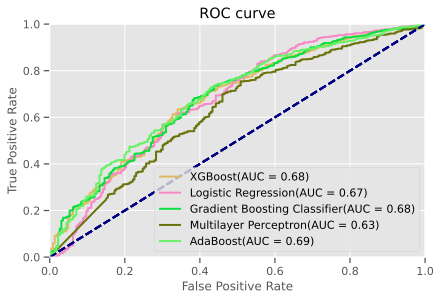

In [211]:
# Comparing ROC curves of top 5 models
plotAUC(y_test,predictproba(xgb),'XGBoost')
plotAUC(y_test,predictproba(logit),'Logistic Regression')
plotAUC(y_test,predictproba(gbc),'Gradient Boosting Classifier')
plotAUC(y_test,predictproba(mlp),'Multilayer Perceptron')
plotAUC(y_test,predictproba(ada),'AdaBoost')
plt.show()

#### **15.1 XGBoost Classifier**

0.793040293040293


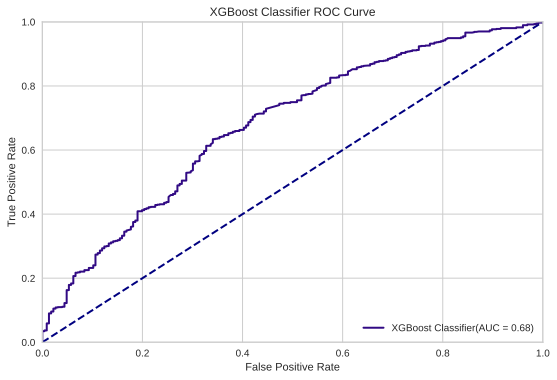

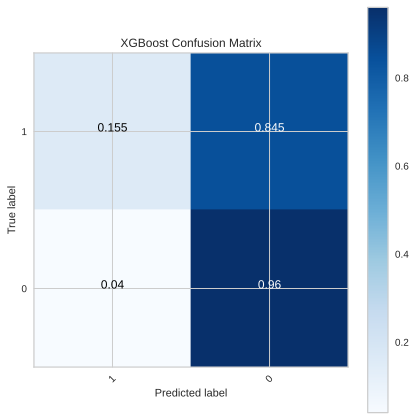

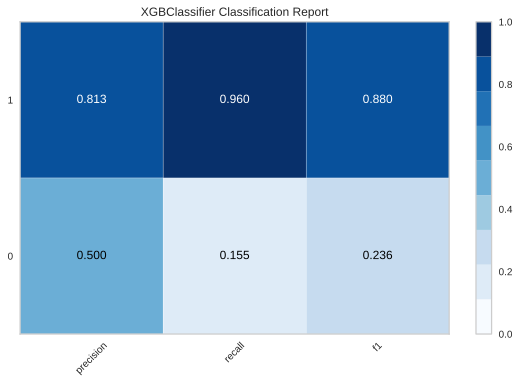

In [212]:
from yellowbrick.classifier import ClassificationReport
xgbAccuracy = accuracy_score(y_test,summary(xgb))
print(xgbAccuracy)

# ROC curve
plotAUC(y_test, predictproba(xgb),'XGBoost Classifier')
plt.title("XGBoost Classifier ROC Curve")
plt.show()

# confusion matrix
plt.figure(figsize=(6,6))
plot_confusion_matrix(summary(xgb), normalize=True)
plt.title("XGBoost Confusion Matrix")
plt.show()

# classification report
fig, ax = plt.subplots()
visualizer = ClassificationReport(xgb, classes=[0, 1], ax=ax, cmap='Blues')
ax.grid(False)
visualizer.fit(X_train, y_train)  # Fit the training data to the visualizer
visualizer.score(X_test, y_test)  # Evaluate the model on the test data
g = visualizer.poof()             # Draw/show/poof the data

#### **15.2 Logistic Regression**

0.7939560439560439


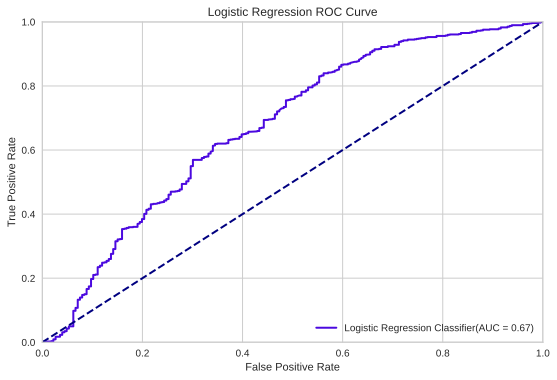

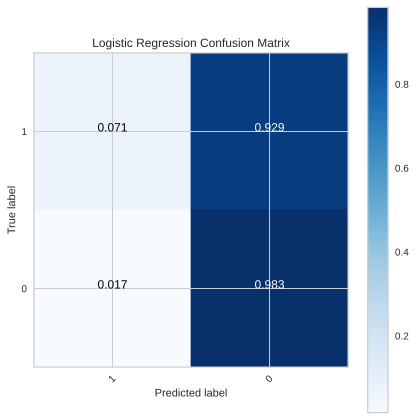

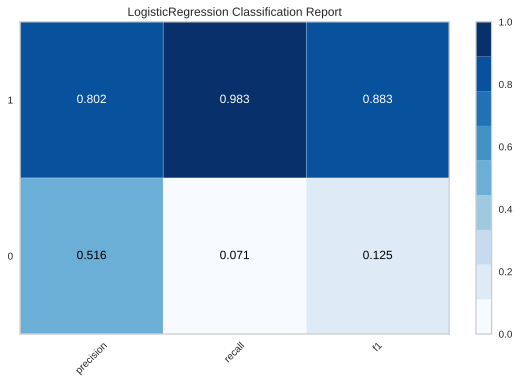

In [213]:
logitAccuracy = accuracy_score(y_test,summary(logit))
print(logitAccuracy)

# ROC curve
plotAUC(y_test,predictproba(logit),'Logistic Regression Classifier')
plt.title("Logistic Regression ROC Curve")
plt.show()

# confusion matrix
plt.figure(figsize=(6,6))
plot_confusion_matrix(summary(logit), normalize=True)
plt.title("Logistic Regression Confusion Matrix")
plt.show()

# classification report
fig, ax = plt.subplots()
visualizer = ClassificationReport(logit, classes=[0, 1], ax=ax, cmap='Blues')
ax.grid(False)
visualizer.fit(X_train, y_train)  # Fit the training data to the visualizer
visualizer.score(X_test, y_test)  # Evaluate the model on the test data
g = visualizer.poof()             # Draw/show/poof the data

### <b>16.0 Make Predictions

In [214]:
# Best Model - XGBoost Classifier
test_sub_X = test[[i for i in test.columns if i not in ['customerid']]]
xgb.fit(X_train,y_train)
sub_prob = xgb_rfe1.predict_proba(test_sub_X)[:,1]
sub_prob = pd.DataFrame(sub_prob)
ids = test[["customerid"]]
subm  = ids.merge(sub_prob,left_index=True,right_index=True,how="left")
xgb_sample_submission  = subm.rename(columns={"customerid":'customerid',0:'Good_Bad_flag'})

In [215]:
# Second Best Model - Logistic Regression
test_sub_X = test[[i for i in test.columns if i not in ['customerid']]]
logit.fit(X_train,y_train)
sub_prob = logit.predict_proba(test_sub_X)[:,1]
sub_prob = pd.DataFrame(sub_prob)
ids = test[["customerid"]]
subm  = ids.merge(sub_prob,left_index=True,right_index=True,how="left")
logit_sample_submission  = subm.rename(columns={"customerid":'customerid',0:'Good_Bad_flag'})

In [216]:
xgb_sample_submission.head(10)

customerid  Good_Bad_flag
6   8a28afc7474813a40147639ec637156b          0.862
12  8a3735d5518aba7301518ac34413010d          0.614
18  8a76e7d443e6e97c0143ed099d102b1d          0.576
21  8a818823525dceef01525deda2480384          0.931
23  8a818926522ea5ef01523aff15c37482          0.825
27  8a8189f9526ad7de015280bef19d5811          0.797
32  8a85880353acff880153b92f8599568b          0.858
33  8a85880353acff880153b9993fe358d9          0.822
34  8a85880353acff880153bd56e93f75ff          0.868
35  8a85881053bc33670153bda8562417c7          0.642

In [217]:
logit_sample_submission.head(10)

customerid  Good_Bad_flag
6   8a28afc7474813a40147639ec637156b          0.807
12  8a3735d5518aba7301518ac34413010d          0.537
18  8a76e7d443e6e97c0143ed099d102b1d          0.689
21  8a818823525dceef01525deda2480384          0.904
23  8a818926522ea5ef01523aff15c37482          0.815
27  8a8189f9526ad7de015280bef19d5811          0.809
32  8a85880353acff880153b92f8599568b          0.882
33  8a85880353acff880153b9993fe358d9          0.915
34  8a85880353acff880153bd56e93f75ff          0.863
35  8a85881053bc33670153bda8562417c7          0.555

In [218]:
xgb_sample_submission.to_csv("submission.csv",index=False)

**Model Deployment**

In [219]:
from datetime import datetime

In [220]:
train.columns

Index(['customerid', 'total_profit', 'avg_profit', 'days_exceeded', 'termdays',
       'TARGET', 'loanamountdeviation', 'profitdeviation', 'S_N',
       'Return_On_Equity', 'Return_On_Asset', 'Current_Ratio',
       'Loan_to_Deposit', 'Cash_to_Deposit', 'Status', 'Time', 'Merger',
       'Age_y', 'Revenue', 'bank_account_type_Other',
       'bank_account_type_Savings', 'employment_status_clients_Permanent',
       'employment_status_clients_Retired',
       'employment_status_clients_Self-Employed',
       'employment_status_clients_Student',
       'employment_status_clients_Unemployed',
       'level_of_education_clients_Post-Graduate',
       'level_of_education_clients_Primary',
       'level_of_education_clients_Secondary', 'Age_x_YoungAge',
       'Age_x_MiddleAge', 'Age_x_SeniorAge'],
      dtype='object')

In [221]:
def trainer(train):
  data = []

  data.append(train.total_profit.mean()) # 1
  data.append(train.avg_profit.mean()) # 2
  data.append(train.loanamountdeviation.mean()) # 5
  data.append(train.profitdeviation.mean()) # 6
  data.append(train.S_N.mean()) # 7
  data.append(train.Return_On_Equity.mean()) # 8
  data.append(train.Return_On_Asset.mean()) # 9
  data.append(train.Current_Ratio.mean()) # 10
  data.append(train.Loan_to_Deposit.mean()) # 11
  data.append(train.Cash_to_Deposit.mean()) # 12
  data.append(train.Status.mean()) # 13
  data.append(train.Time.mean()) # 14
  data.append(train.Merger.mean()) # 15
  data.append(train.Revenue.mean()) # 17

  return data

In [222]:
bank_account_types = ['Other','Savings']
employment_status_clients = ['Permanent','Retired','Self-Employed','Student','Unemployed']
level_of_education_clients = ['Post-Graduate','Primary','Secondary']

In [223]:
def usersdata(data, user_inputs):

  closeddate = user_inputs[0]
  closeddate = datetime.strptime(closeddate, '%m-%d-%Y').date()
  approveddate = user_inputs[1]
  approveddate = datetime.strptime(approveddate, '%m-%d-%Y').date()
  returndays = (closeddate - approveddate).days
  termdays = user_inputs[2] # user
  data.insert(2, (termdays - returndays)) # 3

  data.insert(3, termdays) # 4

  birthdate = user_inputs[3]
  birthdate = datetime.strptime(birthdate, '%m-%d-%Y').date()
  age = 2021-birthdate.year
  data.insert(15, age) # 16

  if user_inputs[4] == 'Other':
    data.insert(17, 1) # 18
    data.insert(18, 0) # 19
  else:
    data.insert(17, 0) # 18
    data.insert(18, 1) # 19

  if user_inputs[5] == 'Permanent': # 20
    data.insert(19, 1) # 20
    data.insert(20, 0) # 21
    data.insert(21, 0) # 22
    data.insert(22, 0) # 23
    data.insert(23, 0) # 24
  elif user_inputs[5] == 'Retired': # 21
    data.insert(19, 0) # 20
    data.insert(20, 1) # 21
    data.insert(21, 0) # 22
    data.insert(22, 0) # 23
    data.insert(23, 0) # 24
  elif user_inputs[5] == 'Self-Employed': # 22
    data.insert(19, 0) # 20
    data.insert(20, 0) # 21
    data.insert(21, 1) # 22
    data.insert(22, 0) # 23
    data.insert(23, 0) # 24
  elif user_inputs[5] == 'Student': # 23
    data.insert(19, 0) # 20
    data.insert(20, 0) # 21
    data.insert(21, 0) # 22
    data.insert(22, 1) # 23
    data.insert(23, 0) # 24
  else: # 24
    data.insert(19, 0) # 20
    data.insert(20, 0) # 21
    data.insert(21, 0) # 22
    data.insert(22, 0) # 23
    data.insert(23, 1) # 24

  if user_inputs[6] == 'Post-Graduate': # 25
    data.insert(24, 1) # 25
    data.insert(25, 0) # 26
    data.insert(26, 0) # 27
  elif user_inputs[6] == 'Primary': # 26
    data.insert(24, 0) # 25
    data.insert(25, 1) # 26
    data.insert(26, 0) # 27
  else: # 27
    data.insert(24, 0) # 25
    data.insert(25, 0) # 26
    data.insert(26, 1) # 27

  if age > 0 and age < 13: # 28
    data.insert(27, 1) # 28
    data.insert(28, 0) # 29
    data.insert(29, 0) # 30
  elif age > 13 and age < 31: # 29
    data.insert(27, 0) # 28
    data.insert(28, 1) # 29
    data.insert(29, 0) # 30
  elif age > 31 and age < 100: # 30
    data.insert(27, 0) # 28
    data.insert(28, 0) # 29
    data.insert(29, 1) # 30

  return data

In [224]:
test_set = trainer(train)

In [225]:
import pickle

In [226]:
data = {"classifier": model, "testing_attr":test_set, "predictor":rfc}
with open('saved_steps.pkl', 'wb') as file:
    pickle.dump(data, file)

In [227]:
!cp saved_steps.pkl "/content/drive/My Drive/Y4_T1/Machine Learning/"

**Abbreviations**

1. AdaBoost	- Adaptive Boosting
2. ANN - Artificial Neural Network
3. AUC - Area Under the Curve
4. CV - Cross-validation
5. DC - Dummy Classifier
6. DT - Decision Tree
7. FN -	False Negatives
8. FP -	False Positives
9. FPR - False Positive Rate
10. RF - Random Forest
11. RF - Recursive Feature Elimination
12. ROC -	Receiver Operator Characteristic
13. SMOTE -	Synthetic Minority Oversampling Technique
15. TN - True Negatives
16. TP - True Positives
17. TPR - True Positive Rate
18. XGBoost - eXtreme Gradient Boosting

### **References**

[1] P. Honohan and T. Beck, "Making Finance Work for Africa", 2007. Available: https://www.researchgate.net/publication/242534854_Making_Finance_Work_for_Africa. [Accessed 24 April 2021].

[2] S. Iftikhar, "The impact of financial reforms on bank’s interest margins", Journal of Financial Economic Policy, vol. 8, no. 1, pp. 120-138, 2016. Available: https://www.researchgate.net/deref/http%3A%2F%2Fdx.doi.org%2F10.1108%2FJFEP-05-2015-0028. [Accessed 24 April 2021].

[3] Divino JA,  Lima  ES, Orrillo  J. Interest  rates and  default in  unsecured loan  markets. Quantitative Finance. 2013;13(12):1925-1934.
 
[4] Lahsana  A,  Anion  R,  Wah  T.  Credit  scoring  models  using  soft  computing  methods:  A  survey. International Arab Journal of Information Technology. 2010;7(2):115-123.
 
[5] L. C. Thomas, E. N. C. Tong, and C. Mues. “Mixture cure models in credit scoring: If and when borrowers default”. In: European Journal of Operational Research 218 (2012), pp. 132–139.

[6] Recursive Feature Elimination (RFE). https : / / www . brainvoyager . com / bv/doc/UsersGuide/MVPA/RecursiveFeatureElimination.html. [Accessed 27 April 2021].

[7] Cyril Goutte and Eric Gaussier. “A probabilistic interpretation of precision, recall and F-score, with implication for evaluation”. In: European Conference on Information Retrieval. Springer. 2005, pp. 345–359.
